# Data Preparation

In [1]:

import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator
import ta
import seaborn as sns
import random
import matplotlib.colors as mcolors


# historical data for Big 8 stocks
tickers = ["AAPL", "MSFT", "GOOGL", "META", "AMZN", "NVDA", "NFLX", "TSLA"]
start = '2017-12-31'
end = '2022-12-31'
today = dt.datetime.today()
adj_price_df = pd.DataFrame()
ohlcv_data = {}

In [2]:
for ticker in tickers:
    adj_price_df[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
adj_price_df

AAPL        MSFT      GOOGL        META       AMZN  \
Date                                                                   
2018-01-02   40.722874   80.391853  53.660500  181.419998  59.450500   
2018-01-03   40.715786   80.765976  54.576000  184.669998  60.209999   
2018-01-04   40.904903   81.476822  54.787998  184.330002  60.479500   
2018-01-05   41.370625   82.486992  55.514500  186.850006  61.457001   
2018-01-08   41.216957   82.571167  55.710499  188.279999  62.343498   
...                ...         ...        ...         ...        ...   
2022-12-23  131.127060  237.112091  89.230003  118.040001  85.250000   
2022-12-27  129.307236  235.354095  87.389999  116.879997  83.040001   
2022-12-28  125.339417  232.940552  86.019997  115.620003  81.820000   
2022-12-29  128.889572  239.376648  88.449997  120.260002  84.180000   
2022-12-30  129.207779  238.194717  88.230003  120.339996  84.000000   

                  NVDA        NFLX        TSLA  
Date                                            
2018-01-02   49.317120  201.070007   21.368668  
2018-01-03   52.562885  205.050003   21.150000  
2018-01-04   52.839947  205.630005   20.974667  
2018-01-05   53.287727  209.990005   21.105333  
2018-01-08   54.920502  212.050003   22.427334  
...                ...         ...         ...  
2022-12-23  152.005920  294.959991  123.150002  
2022-12-27  141.159790  284.170013  109.099998  
2022-12-28  140.310074  276.880005  112.709999  
2022-12-29  145.978073  291.119995  121.820000  
2022-12-30  146.088028  294.880005  123.180000  

[1259 rows x 8 columns]

# Data Exploration

In [4]:
daily_return_df = adj_price_df.pct_change()

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

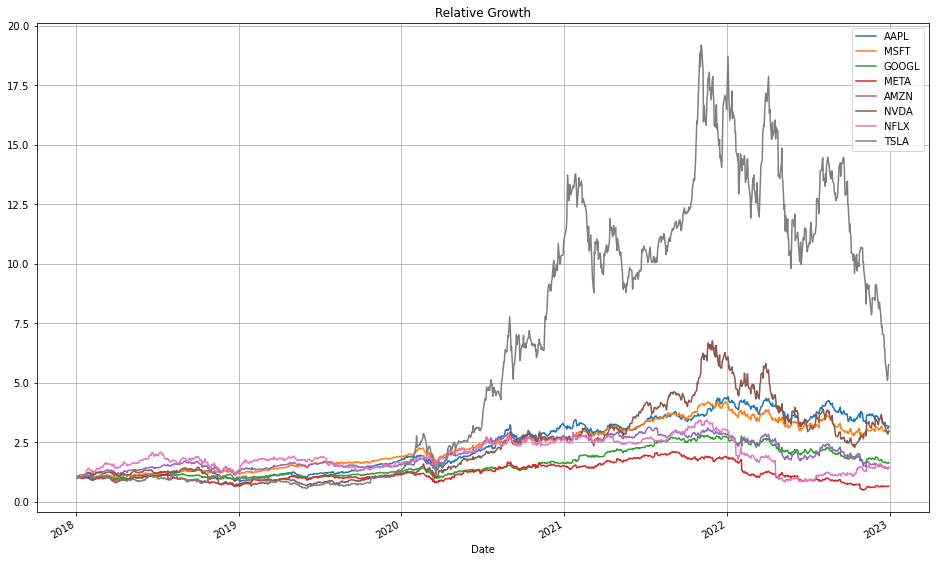

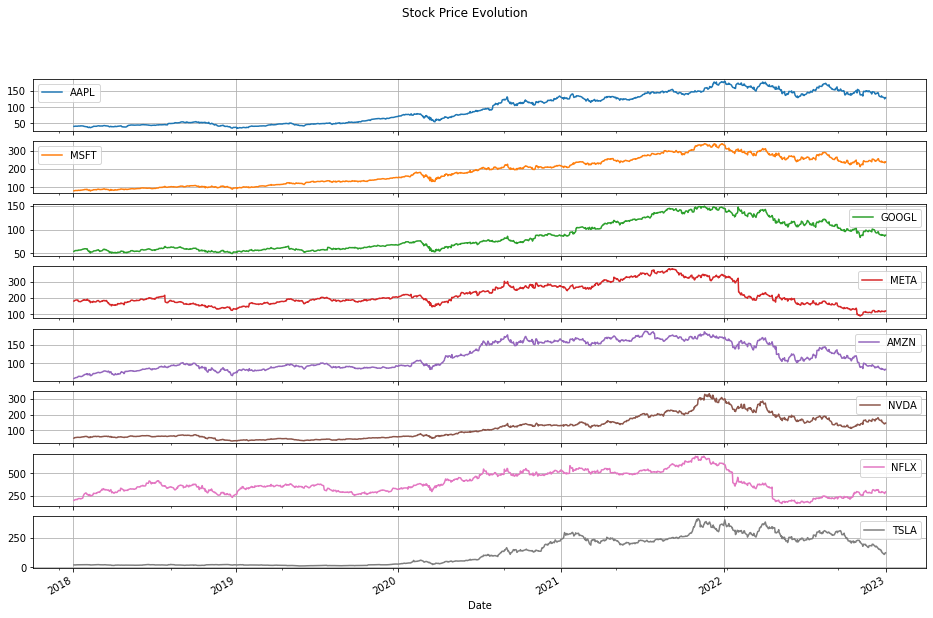

In [5]:
(1 + daily_return_df).cumprod().plot(figsize=(16, 10), title="Relative Growth", grid=True)
adj_price_df.plot(figsize=(16, 10), subplots=True, layout=(8, 1), title="Stock Price Evolution", grid =True) # Subplots of the stocks

In [6]:
daily_return_df.corr()

AAPL      MSFT     GOOGL      META      AMZN      NVDA      NFLX  \
AAPL   1.000000  0.772959  0.700822  0.584575  0.652026  0.665125  0.482989   
MSFT   0.772959  1.000000  0.808735  0.622377  0.715261  0.719510  0.533182   
GOOGL  0.700822  0.808735  1.000000  0.675031  0.682788  0.672557  0.518602   
META   0.584575  0.622377  0.675031  1.000000  0.610645  0.567401  0.525794   
AMZN   0.652026  0.715261  0.682788  0.610645  1.000000  0.646492  0.613882   
NVDA   0.665125  0.719510  0.672557  0.567401  0.646492  1.000000  0.519985   
NFLX   0.482989  0.533182  0.518602  0.525794  0.613882  0.519985  1.000000   
TSLA   0.466155  0.461370  0.411227  0.339746  0.434532  0.479659  0.381368   

           TSLA  
AAPL   0.466155  
MSFT   0.461370  
GOOGL  0.411227  
META   0.339746  
AMZN   0.434532  
NVDA   0.479659  
NFLX   0.381368  
TSLA   1.000000

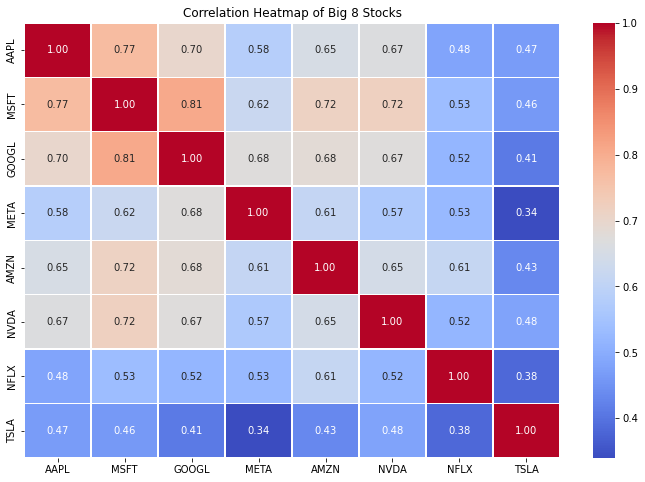

In [7]:
correlation_matrix = daily_return_df.corr()

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 종목별 상관관계 히트맵 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Big 8 Stocks')
plt.show()


# SMA Strategy

In [8]:
sma_df = pd.DataFrame()

In [9]:
for ticker in tickers:
    sma_df[ticker] = adj_price_df[ticker]
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_sma200"] = adj_price_df[ticker].rolling(window=200).mean()

In [10]:
sma_df.dropna(inplace=True)
sma_df

AAPL  AAPL_sma20  AAPL_sma50  AAPL_sma200        MSFT  \
Date                                                                      
2018-10-16   53.120152   53.252983   52.520882    45.128287  105.164894   
2018-10-17   52.890598   53.286699   52.591679    45.189125  104.890144   
2018-10-18   51.654354   53.238755   52.637085    45.243818  102.796310   
2018-10-19   52.441055   53.258483   52.690456    45.301499  102.947914   
2018-10-22   52.761478   53.256809   52.753201    45.358453  103.866920   
...                ...         ...         ...          ...         ...   
2022-12-23  131.127060  139.879144  143.258232   150.924019  237.112091   
2022-12-27  129.307236  139.173588  143.096718   150.804671  235.354095   
2022-12-28  125.339417  138.421293  142.775828   150.685827  232.940552   
2022-12-29  128.889572  137.505413  142.499335   150.562608  239.376648   
2022-12-30  129.207779  136.591521  142.227021   150.418706  238.194717   

            MSFT_sma20  MSFT_sma50  MSFT_sma200      GOOGL  GOOGL_sma20  ...  \
Date                                                                     ...   
2018-10-16  106.378087  104.860392    93.975795  56.653999    58.331400  ...   
2018-10-17  106.331190  104.902977    94.098287  56.379501    58.214700  ...   
2018-10-18  106.091014  104.892171    94.208439  54.895500    57.980550  ...   
2018-10-19  105.825733  104.881000    94.315794  55.258999    57.813200  ...   
2018-10-22  105.586982  104.900855    94.422694  55.568501    57.642725  ...   
...                ...         ...          ...        ...          ...  ...   
2022-12-23  245.494889  238.714057   259.043897  89.230003    94.038001  ...   
2022-12-27  245.256516  238.893678   258.839870  87.389999    93.605001  ...   
2022-12-28  244.968481  238.847344   258.641672  86.019997    93.146500  ...   
2022-12-29  244.266770  238.910518   258.422852  88.449997    92.519500  ...   
2022-12-30  243.528310  238.990068   258.162429  88.230003    91.881501  ...   

            NVDA_sma50  NVDA_sma200        NFLX  NFLX_sma20  NFLX_sma50  \
Date                                                                      
2018-10-16   65.980037    61.193838  346.399994  359.338998  353.974798   
2018-10-17   65.911886    61.248443  364.700012  359.225999  354.232198   
2018-10-18   65.818955    61.282444  346.709991  358.293500  354.214199   
2018-10-19   65.684384    61.302223  332.670013  356.867500  353.880399   
2018-10-22   65.568246    61.322303  329.540009  354.864001  353.553799   
...                ...          ...         ...         ...         ...   
2022-12-23  151.068546   171.710134  294.959991  303.174500  288.902801   
2022-12-27  151.647715   171.312170  284.170013  303.324500  289.986201   
2022-12-28  152.077770   170.948414  276.880005  303.120500  290.621801   
2022-12-29  152.605394   170.530940  291.119995  302.400000  291.627001   
2022-12-30  153.118428   170.037951  294.880005  301.296500  292.077001   

            NFLX_sma200        TSLA  TSLA_sma20  TSLA_sma50  TSLA_sma200  
Date                                                                      
2018-10-16    327.55070   18.439333   18.822400   20.077240    20.861733  
2018-10-17    328.36885   18.118668   18.731600   19.933520    20.845483  
2018-10-18    329.07715   17.594000   18.616867   19.791613    20.827703  
2018-10-19    329.71235   17.333332   18.486533   19.668347    20.809497  
2018-10-22    330.31010   17.396667   18.357433   19.542293    20.790953  
...                 ...         ...         ...         ...          ...  
2022-12-23    250.08970  123.150002  165.201000  187.790000   255.097317  
2022-12-27    249.80895  109.099998  161.510000  185.872200   254.317234  
2022-12-28    249.53830  112.709999  158.104000  183.739400   253.603501  
2022-12-29    249.27515  121.820000  154.460000  181.772000   252.876117  
2022-12-30    248.96190  123.180000  150.884000  179.794800   252.091634  

[1060 rows x 32 columns]

In [11]:
for ticker in tickers:
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] > sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] > sma_df[ticker + '_sma200']), 1, 0)
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] < sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] < sma_df[ticker + '_sma200']), -1, sma_df[ticker + '_position'])

In [12]:
sma_df

AAPL  AAPL_sma20  AAPL_sma50  AAPL_sma200        MSFT  \
Date                                                                      
2018-10-16   53.120152   53.252983   52.520882    45.128287  105.164894   
2018-10-17   52.890598   53.286699   52.591679    45.189125  104.890144   
2018-10-18   51.654354   53.238755   52.637085    45.243818  102.796310   
2018-10-19   52.441055   53.258483   52.690456    45.301499  102.947914   
2018-10-22   52.761478   53.256809   52.753201    45.358453  103.866920   
...                ...         ...         ...          ...         ...   
2022-12-23  131.127060  139.879144  143.258232   150.924019  237.112091   
2022-12-27  129.307236  139.173588  143.096718   150.804671  235.354095   
2022-12-28  125.339417  138.421293  142.775828   150.685827  232.940552   
2022-12-29  128.889572  137.505413  142.499335   150.562608  239.376648   
2022-12-30  129.207779  136.591521  142.227021   150.418706  238.194717   

            MSFT_sma20  MSFT_sma50  MSFT_sma200      GOOGL  GOOGL_sma20  ...  \
Date                                                                     ...   
2018-10-16  106.378087  104.860392    93.975795  56.653999    58.331400  ...   
2018-10-17  106.331190  104.902977    94.098287  56.379501    58.214700  ...   
2018-10-18  106.091014  104.892171    94.208439  54.895500    57.980550  ...   
2018-10-19  105.825733  104.881000    94.315794  55.258999    57.813200  ...   
2018-10-22  105.586982  104.900855    94.422694  55.568501    57.642725  ...   
...                ...         ...          ...        ...          ...  ...   
2022-12-23  245.494889  238.714057   259.043897  89.230003    94.038001  ...   
2022-12-27  245.256516  238.893678   258.839870  87.389999    93.605001  ...   
2022-12-28  244.968481  238.847344   258.641672  86.019997    93.146500  ...   
2022-12-29  244.266770  238.910518   258.422852  88.449997    92.519500  ...   
2022-12-30  243.528310  238.990068   258.162429  88.230003    91.881501  ...   

            TSLA_sma50  TSLA_sma200  AAPL_position  MSFT_position  \
Date                                                                
2018-10-16   20.077240    20.861733              1              1   
2018-10-17   19.933520    20.845483              1              1   
2018-10-18   19.791613    20.827703              1              1   
2018-10-19   19.668347    20.809497              1              1   
2018-10-22   19.542293    20.790953              1              1   
...                ...          ...            ...            ...   
2022-12-23  187.790000   255.097317             -1              0   
2022-12-27  185.872200   254.317234             -1              0   
2022-12-28  183.739400   253.603501             -1              0   
2022-12-29  181.772000   252.876117             -1              0   
2022-12-30  179.794800   252.091634             -1              0   

            GOOGL_position  META_position  AMZN_position  NVDA_position  \
Date                                                                      
2018-10-16               0             -1              0              0   
2018-10-17               0             -1              0              0   
2018-10-18               0             -1              0              0   
2018-10-19               0             -1              0              0   
2018-10-22               0             -1              0              0   
...                    ...            ...            ...            ...   
2022-12-23              -1              0             -1              0   
2022-12-27              -1              0             -1              0   
2022-12-28              -1              0             -1              0   
2022-12-29              -1              0             -1              0   
2022-12-30              -1              0             -1              0   

            NFLX_position  TSLA_position  
Date                                      
2018-10-16              1             -1 

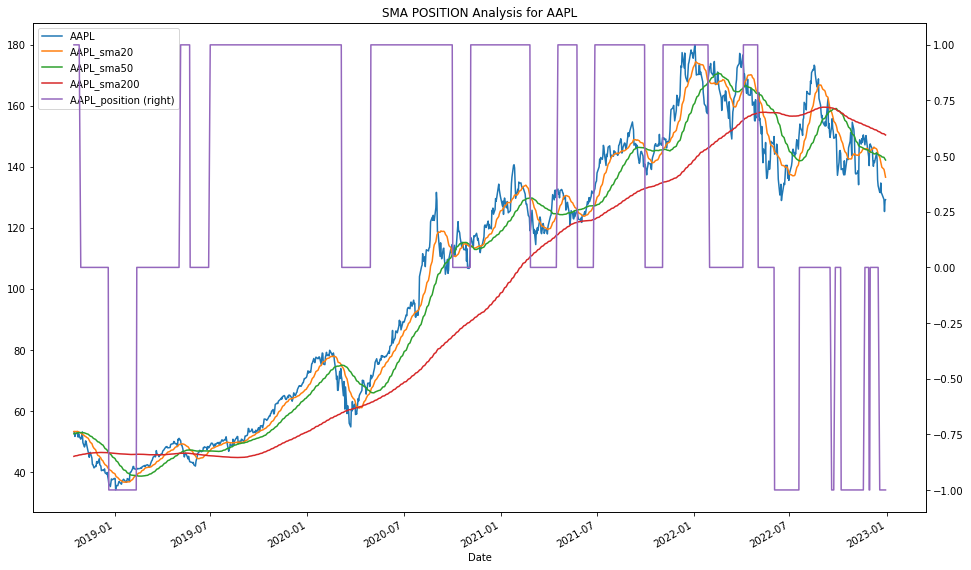

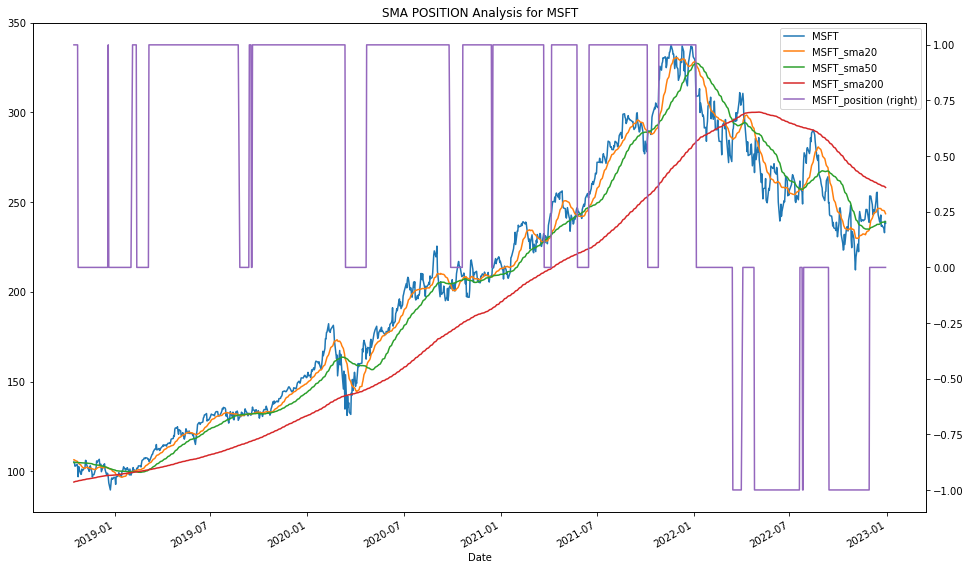

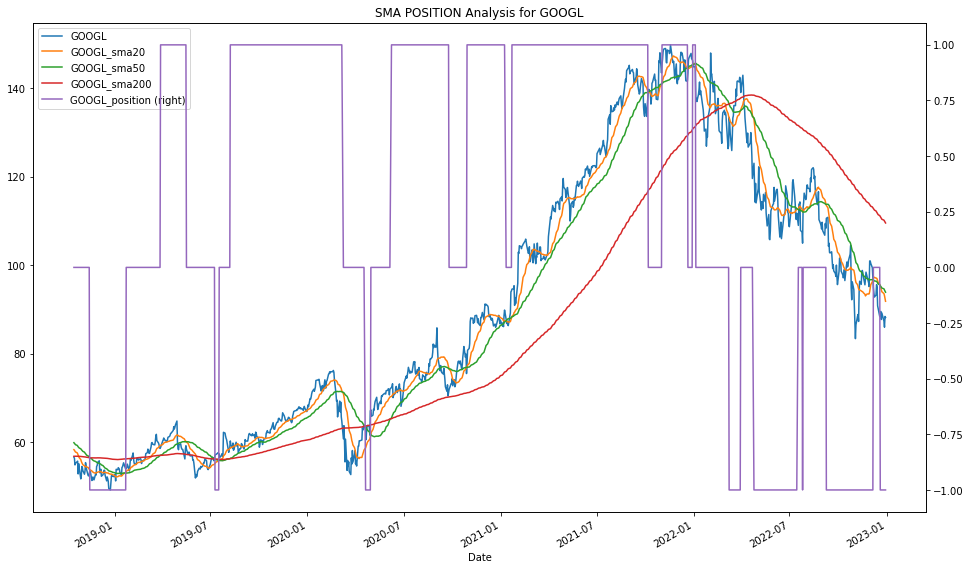

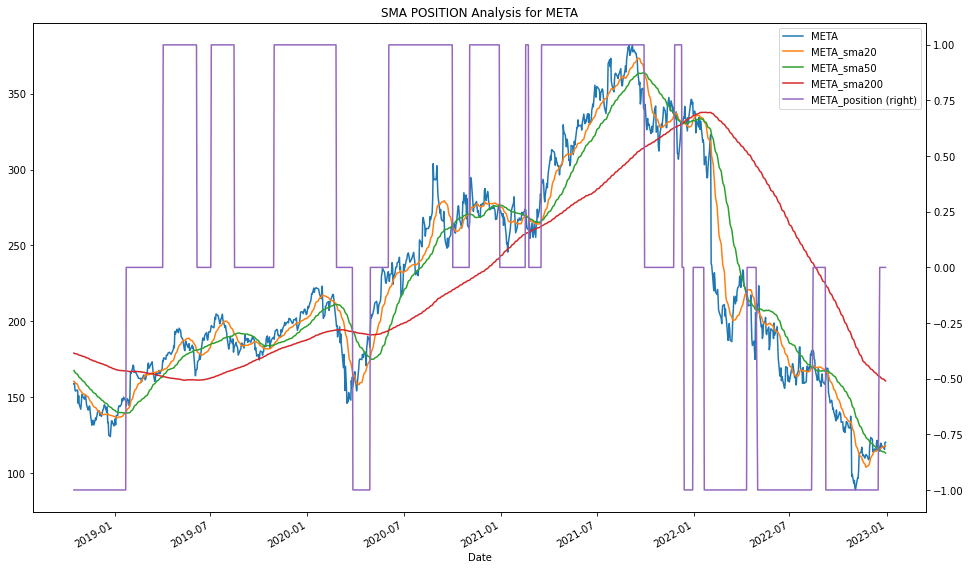

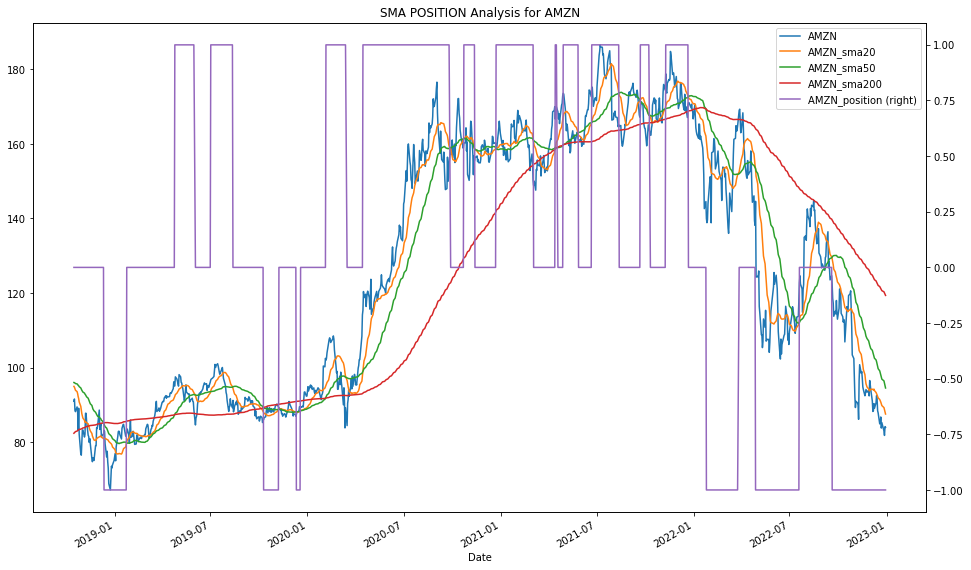

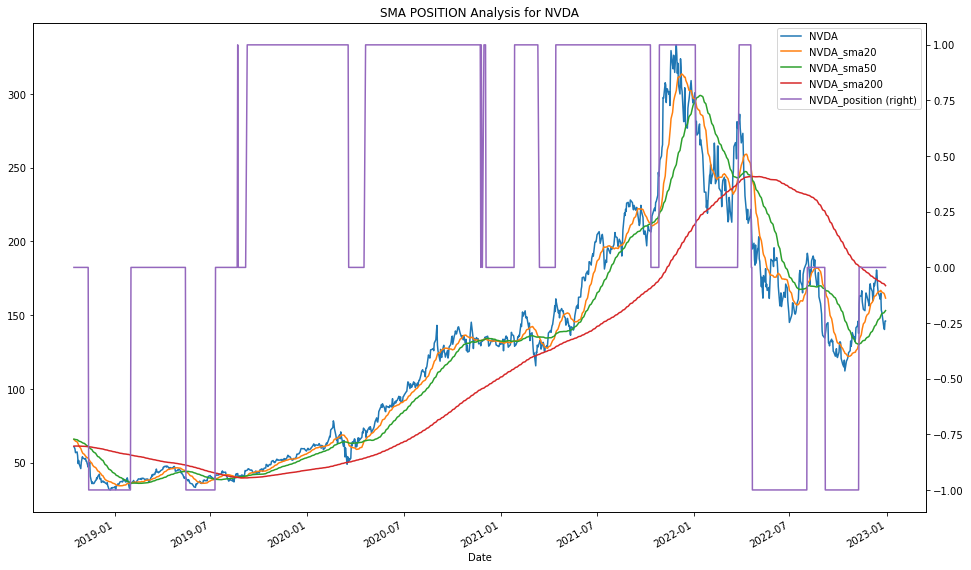

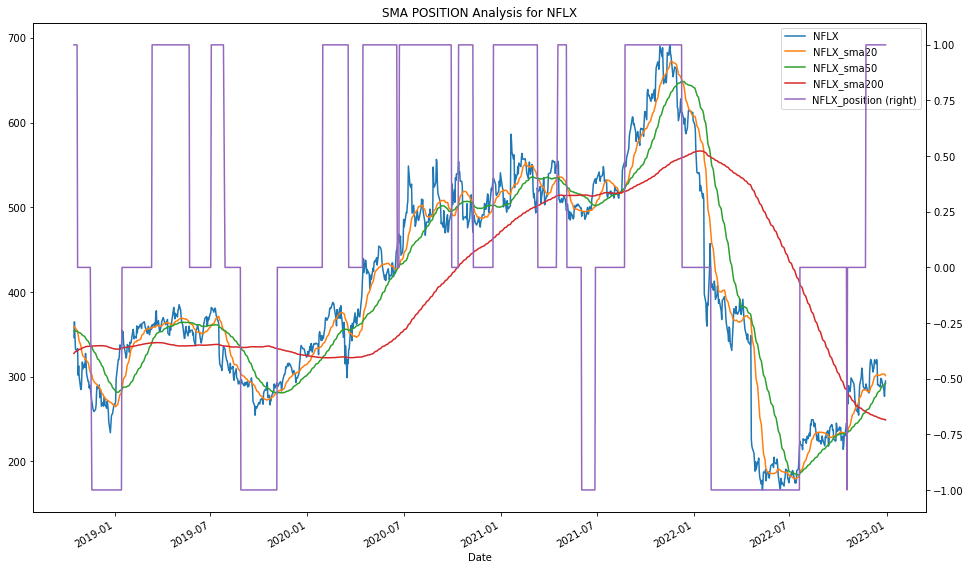

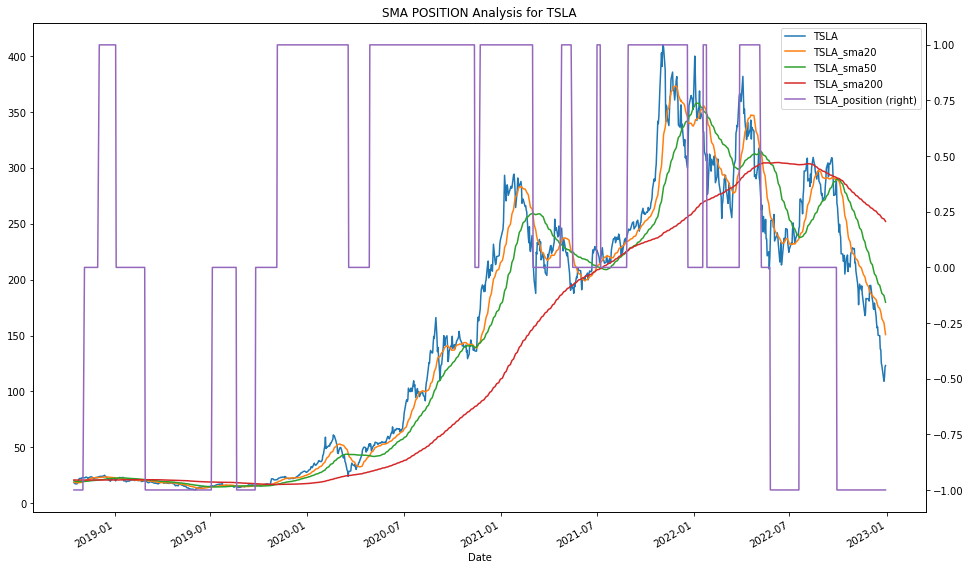

In [13]:
#시각화
for ticker in tickers:
    ax = sma_df[[ticker, ticker + '_sma20', ticker + '_sma50', ticker + '_sma200', ticker + '_position']].plot(figsize=(16, 10), secondary_y=(ticker + '_position'))
    ax.get_legend()
    ax.set_title(f'SMA POSITION Analysis for {ticker}')

# MACD STRATEGY

In [14]:
macd_df = pd.DataFrame()

< MACD 기본 포지션 진입,종료 로직>
- MACD 선이 MACD 시그널 선을 돌파하면 포지션 진입
- MACD 선이 MACD 시그널 선을 재돌파하면 포지션 종료

In [15]:
for ticker in tickers:
    #close 넣어주자 
    macd_df[ticker] = adj_price_df[ticker]

    # MACD 계산
    # 단기 이동 평균 기간 12일, 장기 이동 평균 기간 26일
    macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)

    # MACD 시그널 계산
    # 신호선의 이동 평균 기간을 9일로 설정합니다.
    macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)

    # MACD와 시그널선의 차이
    macd_df[ticker + "_macd_diff"] = ta.trend.macd_diff(adj_price_df[ticker], 12, 26, 9)


In [16]:
macd_df.dropna(inplace=True)
macd_df

AAPL  AAPL_macd  AAPL_macd_signal  AAPL_macd_diff  \
Date                                                                  
2018-02-20   40.791592   0.149672          0.567563       -0.417891   
2018-02-21   40.606445   0.060577          0.466165       -0.405589   
2018-02-22   40.945885  -0.036996          0.365533       -0.402529   
2018-02-23   41.657978  -0.169825          0.258462       -0.428286   
2018-02-26   42.481647  -0.337664          0.139237       -0.476900   
...                ...        ...               ...             ...   
2022-12-23  131.127060   3.634480          2.533943        1.100537   
2022-12-27  129.307236   3.899656          2.807086        1.092570   
2022-12-28  125.339417   4.379496          3.121568        1.257928   
2022-12-29  128.889572   4.422326          3.381719        1.040607   
2022-12-30  129.207779   4.380102          3.581396        0.798706   

                  MSFT  MSFT_macd  MSFT_macd_signal  MSFT_macd_diff  \
Date                                                                  
2018-02-20   87.131409  -0.620806         -0.437158       -0.183648   
2018-02-21   85.975548  -0.629585         -0.475643       -0.153942   
2018-02-22   86.201096  -0.647282         -0.509971       -0.137311   
2018-02-23   88.390671  -0.828437         -0.573664       -0.254772   
2018-02-26   89.668678  -1.062876         -0.671506       -0.391369   
...                ...        ...               ...             ...   
2022-12-23  237.112091   0.190021         -1.549909        1.739930   
2022-12-27  235.354095   0.752402         -1.089447        1.841849   
2022-12-28  232.940552   1.376973         -0.596163        1.973136   
2022-12-29  239.376648   1.337197         -0.209491        1.546687   
2022-12-30  238.194717   1.385079          0.109423        1.275656   

                GOOGL  GOOGL_macd  ...  NVDA_macd_signal  NVDA_macd_diff  \
Date                               ...                                     
2018-02-20  55.179501    0.573279  ...         -1.079342       -0.323936   
2018-02-21  55.687500    0.429856  ...         -1.138955       -0.238453   
2018-02-22  55.494999    0.327945  ...         -1.182573       -0.174471   
2018-02-23  56.404499    0.171810  ...         -1.226111       -0.174155   
2018-02-26  57.185001   -0.014738  ...         -1.267091       -0.163918   
...               ...         ...  ...               ...             ...   
2022-12-23  89.230003    2.062129  ...         -4.408541        3.019980   
2022-12-27  87.389999    2.210383  ...         -3.441763        3.867111   
2022-12-28  86.019997    2.410636  ...         -2.371523        4.280961   
2022-12-29  88.449997    2.346211  ...         -1.377563        3.975841   
2022-12-30  88.230003    2.286547  ...         -0.482133        3.581720   

                  NFLX  NFLX_macd  NFLX_macd_signal  NFLX_macd_diff  \
Date                                                                  
2018-02-20  278.549988 -11.664931        -11.702805        0.037874   
2018-02-21  281.040009 -11.948837        -11.752011       -0.196826   
2018-02-22  278.140015 -11.803763        -11.762362       -0.041402   
2018-02-23  285.929993 -12.177008        -11.845291       -0.331717   
2018-02-26  294.160004 -12.987193        -12.073671       -0.913521   
...                ...        ...               ...             ...   
2022-12-23  294.959991  -1.990539         -4.998226        3.007686   
2022-12-27  284.170013  -0.678229         -4.134226        3.455998   
2022-12-28  276.880005   0.939203         -3.119540        4.058744   
2022-12-29  291.119995   1.059765         -2.283679        3.343444   
2022-12-30  294.880005   0.842201         -1.658503        2.500705   

                  TSLA  TSLA_macd  TSLA_macd_signal  TSLA_macd_diff  
Date                                                                 
2018-02-20   22.318001   0.108737          0.084682        0.024055  
2018-02-21   22.219999   0.089474          0.08

In [17]:
for ticker in tickers:
    # MACD 지표 계산
    macd_df[ticker + '_macd'] = ta.trend.macd(sma_df[ticker], 12, 26)
    macd_df[ticker + '_macd_signal'] = ta.trend.macd_signal(sma_df[ticker], 12, 26, 9)

    # 포지션 결정
    # MACD가 신호선 위에 있으면 매수 포지션(1), 아래에 있으면 매도 포지션(-1)
    macd_df[ticker + '_position'] = np.where(macd_df[ticker + '_macd'] > macd_df[ticker + '_macd_signal'], 1, np.where(macd_df[ticker + '_macd'] < macd_df[ticker + '_macd_signal'], -1, 0))

    # 포지션 유지 또는 종료 로직
    # 이전 포지션을 유지하기 위해 'ffill'을 사용
    macd_df[ticker + '_position'] = macd_df[ticker + '_position'].replace(to_replace=0, method='ffill')


In [18]:
macd_df

AAPL  AAPL_macd  AAPL_macd_signal  AAPL_macd_diff  \
Date                                                                  
2018-02-20   40.791592        NaN               NaN       -0.417891   
2018-02-21   40.606445        NaN               NaN       -0.405589   
2018-02-22   40.945885        NaN               NaN       -0.402529   
2018-02-23   41.657978        NaN               NaN       -0.428286   
2018-02-26   42.481647        NaN               NaN       -0.476900   
...                ...        ...               ...             ...   
2022-12-23  131.127060   3.634480          2.533943        1.100537   
2022-12-27  129.307236   3.899656          2.807086        1.092570   
2022-12-28  125.339417   4.379496          3.121568        1.257928   
2022-12-29  128.889572   4.422326          3.381719        1.040607   
2022-12-30  129.207779   4.380102          3.581396        0.798706   

                  MSFT  MSFT_macd  MSFT_macd_signal  MSFT_macd_diff  \
Date                                                                  
2018-02-20   87.131409        NaN               NaN       -0.183648   
2018-02-21   85.975548        NaN               NaN       -0.153942   
2018-02-22   86.201096        NaN               NaN       -0.137311   
2018-02-23   88.390671        NaN               NaN       -0.254772   
2018-02-26   89.668678        NaN               NaN       -0.391369   
...                ...        ...               ...             ...   
2022-12-23  237.112091   0.190021         -1.549909        1.739930   
2022-12-27  235.354095   0.752402         -1.089447        1.841849   
2022-12-28  232.940552   1.376973         -0.596163        1.973136   
2022-12-29  239.376648   1.337197         -0.209491        1.546687   
2022-12-30  238.194717   1.385079          0.109423        1.275656   

                GOOGL  GOOGL_macd  ...  TSLA_macd_signal  TSLA_macd_diff  \
Date                               ...                                     
2018-02-20  55.179501         NaN  ...               NaN        0.024055   
2018-02-21  55.687500         NaN  ...               NaN        0.003833   
2018-02-22  55.494999         NaN  ...               NaN       -0.064579   
2018-02-23  56.404499         NaN  ...               NaN       -0.129723   
2018-02-26  57.185001         NaN  ...               NaN       -0.186938   
...               ...         ...  ...               ...             ...   
2022-12-23  89.230003    2.062129  ...         13.664886        3.579883   
2022-12-27  87.389999    2.210383  ...         14.746507        4.326487   
2022-12-28  86.019997    2.410636  ...         15.797212        4.202820   
2022-12-29  88.449997    2.346211  ...         16.592110        3.179590   
2022-12-30  88.230003    2.286547  ...         17.125488        2.133511   

            AAPL_position  MSFT_position  GOOGL_position  META_position  \
Date                                                                      
2018-02-20              0              0               0              0   
2018-02-21              0              0               0              0   
2018-02-22              0              0               0              0   
2018-02-23              0              0               0              0   
2018-02-26              0              0               0              0   
...                   ...            ...             ...            ...   
2022-12-23              1              1               1             -1   
2022-12-27              1              1               1             -1   
2022-12-28              1              1               1              1   
2022-12-29              1              1               1             -1   
2022-12-30              1              1               1             -1   

            AMZN_position  NVDA_position  NFLX_position  TSLA_position  
Date                                                                    
2018-02-20              0              0              0    

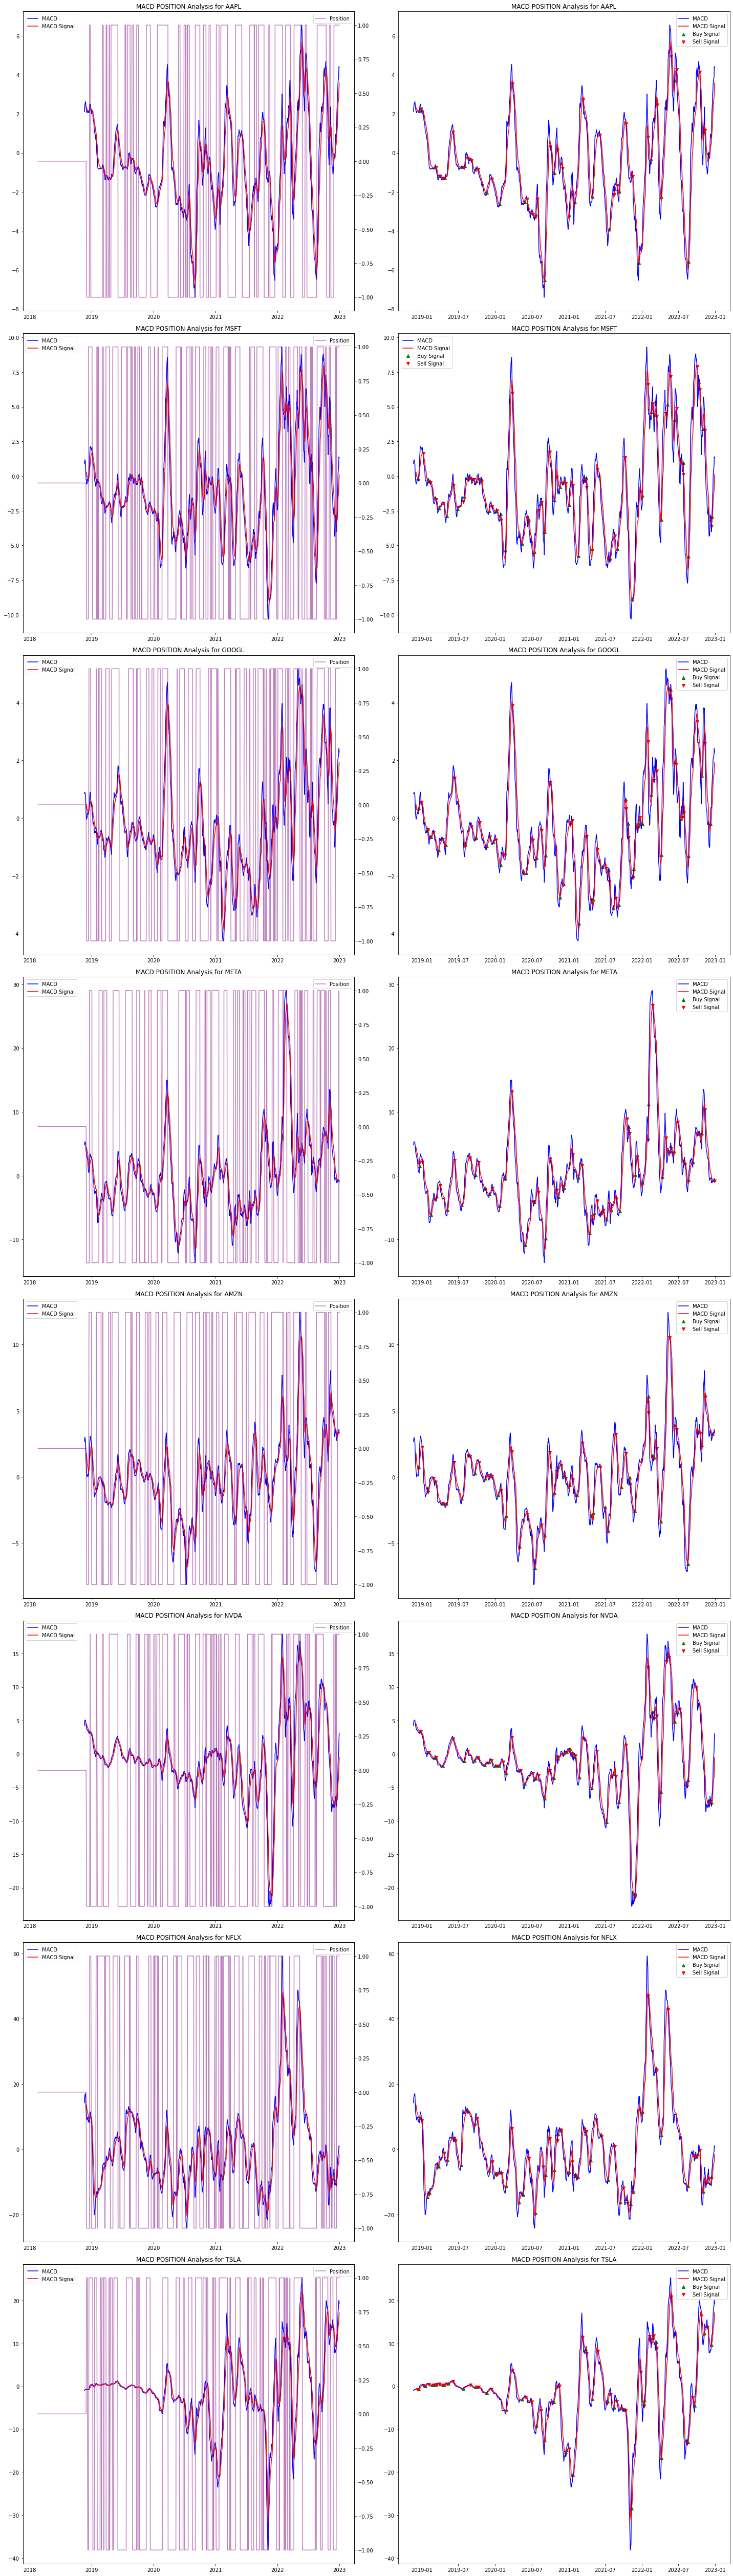

In [19]:
# 진입횟수가 잦아서 macd는 선그래프만으로 보면 가독성 떨어져서 마커 추가 
# 8행 2열 서브플롯 
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(20, 70))

for i, ticker in enumerate(tickers):
    # 인덱스를 Numpy 배열로 변환
    index_array = macd_df.index.to_numpy()

    # 1열: 포지션 데이터를 포함한 MACD 선 그래프
    ax1 = axes[i, 0]
    ax1.plot(index_array, macd_df[ticker + '_macd'].values, label='MACD', color='blue')
    ax1.plot(index_array, macd_df[ticker + '_macd_signal'].values, label='MACD Signal', color='red')
    ax1_2 = ax1.twinx()
    ax1_2.plot(index_array, macd_df[ticker + '_position'].values, label='Position', color='purple', alpha=0.5)
    ax1.set_title(f'MACD POSITION Analysis for {ticker}')
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    # 2열: 매수 및 매도 신호가 마커로 표시된 MACD 그래프
    ax2 = axes[i, 1]
    ax2.plot(index_array, macd_df[ticker + '_macd'].values, label='MACD', color='blue')
    ax2.plot(index_array, macd_df[ticker + '_macd_signal'].values, label='MACD Signal', color='red')
    buy_signals = (macd_df[ticker + '_macd'].values > macd_df[ticker + '_macd_signal'].values) & (np.roll(macd_df[ticker + '_macd'].values, 1) <= np.roll(macd_df[ticker + '_macd_signal'].values, 1))
    sell_signals = (macd_df[ticker + '_macd'].values < macd_df[ticker + '_macd_signal'].values) & (np.roll(macd_df[ticker + '_macd'].values, 1) >= np.roll(macd_df[ticker + '_macd_signal'].values, 1))
    ax2.scatter(index_array[buy_signals], macd_df[ticker + '_macd'][buy_signals].values, label='Buy Signal', marker='^', color='green', alpha=1)
    ax2.scatter(index_array[sell_signals], macd_df[ticker + '_macd'][sell_signals].values, label='Sell Signal', marker='v', color='red', alpha=1)
    ax2.set_title(f'MACD POSITION Analysis for {ticker}')
    ax2.legend()

plt.tight_layout()
plt.show()


# RSI STRATEGY

In [20]:
rsi_df = pd.DataFrame()


<RSI 기본 포지션 종료 로직>
- 중립 구간 설정: 포지션을 열 때 사용된 임계값(ex: 30과 70)과는 다른, 중립적인 임계값을 설정하여 이 구간에 들어오면 포지션을 종료
- 예를 들어, 공매수 포지션(30 이하에서 시작)은 RSI가 5055 사이에 들어오면 종료하고, 공매도 포지션(70 이상에서 시작)은 RSI가 4550 사이에 들어오면 종료

In [21]:
for ticker in tickers:
    # RSI 계산
    rsi = RSIIndicator(adj_price_df[ticker]).rsi()

    # 트레이딩 신호 생성
    long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 공매수 신호
    short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 공매도 신호

    # 포지션 종료 신호 생성
    exit_long_signal = np.where((rsi >= 50) & (rsi <= 55), -1, 0)  # 공매수 포지션 종료 신호
    exit_short_signal = np.where((rsi <= 50) & (rsi >= 45), 1, 0)  # 공매도 포지션 종료 신호

    # 최종 포지션 결정
    position = np.zeros_like(rsi)  # 포지션 배열 초기화
    for i in range(1, len(rsi)):
        if position[i-1] != 0:  # 이미 포지션에 있는 경우
            # 현재 포지션 유지 또는 종료 여부 확인
            if (position[i-1] == 1 and exit_long_signal[i] == -1) or (position[i-1] == -1 and exit_short_signal[i] == 1):
                position[i] = 0  # 포지션 종료
            else:
                position[i] = position[i-1]  # 기존 포지션 유지
        else:
            # 새로운 포지션 결정
            position[i] = long_signal[i] + short_signal[i]

    # 결과 저장
    rsi_df[ticker + '_RSI'] = rsi
    rsi_df[ticker + '_position'] = position



In [22]:
rsi_df


AAPL_RSI  AAPL_position   MSFT_RSI  MSFT_position  GOOGL_RSI  \
Date                                                                        
2018-01-02        NaN            0.0        NaN            0.0        NaN   
2018-01-03        NaN            0.0        NaN            0.0        NaN   
2018-01-04        NaN            0.0        NaN            0.0        NaN   
2018-01-05        NaN            0.0        NaN            0.0        NaN   
2018-01-08        NaN            0.0        NaN            0.0        NaN   
...               ...            ...        ...            ...        ...   
2022-12-23  35.694629            0.0  44.140516            0.0  40.009451   
2022-12-27  33.675318            0.0  42.575152            0.0  36.714162   
2022-12-28  29.726626            1.0  40.454047            0.0  34.439705   
2022-12-29  36.860462            1.0  47.907135            0.0  41.376879   
2022-12-30  37.473158            1.0  46.749907            0.0  40.954375   

            GOOGL_position   META_RSI  META_position   AMZN_RSI  \
Date                                                              
2018-01-02             0.0        NaN            0.0        NaN   
2018-01-03             0.0        NaN            0.0        NaN   
2018-01-04             0.0        NaN            0.0        NaN   
2018-01-05             0.0        NaN            0.0        NaN   
2018-01-08             0.0        NaN            0.0        NaN   
...                    ...        ...            ...        ...   
2022-12-23             0.0  52.010119            0.0  38.027561   
2022-12-27             0.0  50.473977            0.0  34.876981   
2022-12-28             0.0  48.788379            0.0  33.239777   
2022-12-29             0.0  54.777645            0.0  39.186785   
2022-12-30             0.0  54.875626            0.0  38.902142   

            AMZN_position   NVDA_RSI  NVDA_position   NFLX_RSI  NFLX_position  \
Date                                                                            
2018-01-02            0.0        NaN            0.0        NaN            0.0   
2018-01-03            0.0        NaN            0.0        NaN            0.0   
2018-01-04            0.0        NaN            0.0        NaN            0.0   
2018-01-05            0.0        NaN            0.0        NaN            0.0   
2018-01-08            0.0        NaN            0.0        NaN            0.0   
...                   ...        ...            ...        ...            ...   
2022-12-23            1.0  42.515513            0.0  49.090684            0.0   
2022-12-27            1.0  35.994763            0.0  43.265590            0.0   
2022-12-28            1.0  35.534941            0.0  39.827050            0.0   
2022-12-29            1.0  40.953513            0.0  48.446099            0.0   
2022-12-30            1.0  41.057018            0.0  50.463746            0.0   

             TSLA_RSI  TSLA_position  
Date                                  
2018-01-02        NaN            0.0  
2018-01-03        NaN            0.0  
2018-01-04        NaN            0.0  
2018-01-05        NaN            0.0  
2018-01-08        NaN            0.0  
...               ...            ...  
2022-12-23  19.819923            1.0  
2022-12-27  16.564126            1.0  
2022-12-28  20.191722            1.0  
2022-12-29  28.625201            1.0  
2022-12-30  29.817521            1.0  

[1259 rows x 16 columns]

In [23]:
# 포지션 진입, 종료 시점과 해당 시점의 RSI 값을 출력(이상없이 위의 rsi 포지션 진입,종료 데이터 들어감을 알수 있음.)
# 포지션 변경 정보를 저장할 리스트 초기화
position_changes = []

# 모든 티커에 대해 포지션 변경 검사
for ticker in tickers:
    # 해당 티커의 RSI 및 포지션 데이터 가져오기
    ticker_rsi = rsi_df[ticker + '_RSI']
    ticker_position = rsi_df[ticker + '_position']

    # 이전 포지션 상태 초기화
    prev_position = 0

    # 각 날짜에 대해 반복
    for i in range(len(ticker_rsi)):
        current_position = ticker_position[i]
        # 포지션 변경이 발생한 경우
        if current_position != prev_position:
            position_changes.append({
                'Date': adj_price_df.index[i],
                'Ticker': ticker,
                'RSI': ticker_rsi[i],
                'Position_Change': current_position
            })
            prev_position = current_position

# 결과 출력
for change in position_changes:
    change_type = 'Entry' if change['Position_Change'] != 0 else 'Exit'
    print(f"Date: {change['Date']}, Ticker: {change['Ticker']}, RSI: {change['RSI']}, Change: {change_type}")


Date: 2018-01-29 00:00:00, Ticker: AAPL, RSI: 28.59144197405675, Change: Entry
Date: 2018-02-14 00:00:00, Ticker: AAPL, RSI: 51.37783891439999, Change: Exit
Date: 2018-05-09 00:00:00, Ticker: AAPL, RSI: 70.0487175649743, Change: Entry
Date: 2018-06-20 00:00:00, Ticker: AAPL, RSI: 46.79967601767689, Change: Exit
Date: 2018-08-01 00:00:00, Ticker: AAPL, RSI: 70.34656787174086, Change: Entry
Date: 2018-10-15 00:00:00, Ticker: AAPL, RSI: 45.557064343830945, Change: Exit
Date: 2018-11-20 00:00:00, Ticker: AAPL, RSI: 29.060460070258017, Change: Entry
Date: 2019-05-07 00:00:00, Ticker: AAPL, RSI: 52.82585326236382, Change: Exit
Date: 2019-05-31 00:00:00, Ticker: AAPL, RSI: 29.59418177625905, Change: Entry
Date: 2019-06-07 00:00:00, Ticker: AAPL, RSI: 54.75812257862281, Change: Exit
Date: 2019-10-21 00:00:00, Ticker: AAPL, RSI: 72.23055058297959, Change: Entry
Date: 2020-02-21 00:00:00, Ticker: AAPL, RSI: 48.01468106669758, Change: Exit
Date: 2020-02-27 00:00:00, Ticker: AAPL, RSI: 28.73415280

In [24]:
# 각 종목별 RSI 컬럼에 대해 첫 번째 결측값이 없는 인덱스 찾기
first_valid_indices = {}
for ticker in tickers:
    first_valid_indices[ticker] = rsi_df[ticker + '_RSI'].first_valid_index()

first_valid_indices

{'AAPL': Timestamp('2018-01-22 00:00:00'),
 'MSFT': Timestamp('2018-01-22 00:00:00'),
 'GOOGL': Timestamp('2018-01-22 00:00:00'),
 'META': Timestamp('2018-01-22 00:00:00'),
 'AMZN': Timestamp('2018-01-22 00:00:00'),
 'NVDA': Timestamp('2018-01-22 00:00:00'),
 'NFLX': Timestamp('2018-01-22 00:00:00'),
 'TSLA': Timestamp('2018-01-22 00:00:00')}

In [25]:
# 2018년 1월 22일 이후 데이터에서 결측값 확인.
missing_values_after_date = rsi_df.loc['2018-01-22':].isna().any()
missing_values_after_date


AAPL_RSI          False
AAPL_position     False
MSFT_RSI          False
MSFT_position     False
GOOGL_RSI         False
GOOGL_position    False
META_RSI          False
META_position     False
AMZN_RSI          False
AMZN_position     False
NVDA_RSI          False
NVDA_position     False
NFLX_RSI          False
NFLX_position     False
TSLA_RSI          False
TSLA_position     False
dtype: bool

In [26]:
# 결측값 제거(2017-12-31 ~2018-01-21까지 약 한 달 간의 데이터는 rsi 값 제공되지 않으므로 제거)
# rsi는 결측치 문제로 2018-01-22 ~ 2022-12-31까지의 데이터로 진행 ㄱㄱ
rsi_df.dropna(inplace=True)
rsi_df

AAPL_RSI  AAPL_position   MSFT_RSI  MSFT_position  GOOGL_RSI  \
Date                                                                        
2018-01-22  63.443234            0.0  80.027332           -1.0  92.958749   
2018-01-23  63.619093            0.0  80.923410           -1.0  94.032528   
2018-01-24  46.580091            0.0  79.858861           -1.0  88.150187   
2018-01-25  35.338835            0.0  81.526987           -1.0  89.693884   
2018-01-26  37.430525            0.0  85.817938           -1.0  90.368852   
...               ...            ...        ...            ...        ...   
2022-12-23  35.694629            0.0  44.140516            0.0  40.009451   
2022-12-27  33.675318            0.0  42.575152            0.0  36.714162   
2022-12-28  29.726626            1.0  40.454047            0.0  34.439705   
2022-12-29  36.860462            1.0  47.907135            0.0  41.376879   
2022-12-30  37.473158            1.0  46.749907            0.0  40.954375   

            GOOGL_position   META_RSI  META_position   AMZN_RSI  \
Date                                                              
2018-01-22            -1.0  58.313005            0.0  91.176280   
2018-01-23            -1.0  66.248157            0.0  93.458443   
2018-01-24            -1.0  57.898294            0.0  89.883987   
2018-01-25            -1.0  59.714480            0.0  91.334406   
2018-01-26            -1.0  64.218732            0.0  92.669056   
...                    ...        ...            ...        ...   
2022-12-23             0.0  52.010119            0.0  38.027561   
2022-12-27             0.0  50.473977            0.0  34.876981   
2022-12-28             0.0  48.788379            0.0  33.239777   
2022-12-29             0.0  54.777645            0.0  39.186785   
2022-12-30             0.0  54.875626            0.0  38.902142   

            AMZN_position   NVDA_RSI  NVDA_position   NFLX_RSI  NFLX_position  \
Date                                                                            
2018-01-22           -1.0  88.325314           -1.0  82.673535           -1.0   
2018-01-23           -1.0  90.328970           -1.0  90.850822           -1.0   
2018-01-24           -1.0  81.368959           -1.0  92.659561           -1.0   
2018-01-25           -1.0  81.714392           -1.0  93.685276           -1.0   
2018-01-26           -1.0  85.411314           -1.0  94.194861           -1.0   
...                   ...        ...            ...        ...            ...   
2022-12-23            1.0  42.515513            0.0  49.090684            0.0   
2022-12-27            1.0  35.994763            0.0  43.265590            0.0   
2022-12-28            1.0  35.534941            0.0  39.827050            0.0   
2022-12-29            1.0  40.953513            0.0  48.446099            0.0   
2022-12-30            1.0  41.057018            0.0  50.463746            0.0   

             TSLA_RSI  TSLA_position  
Date                                  
2018-01-22  79.538744           -1.0  
2018-01-23  80.257673           -1.0  
2018-01-24  66.204741           -1.0  
2018-01-25  54.024350           -1.0  
2018-01-26  59.137257           -1.0  
...               ...            ...  
2022-12-23  19.819923            1.0  
2022-12-27  16.564126            1.0  
2022-12-28  20.191722            1.0  
2022-12-29  28.625201            1.0  
2022-12-30  29.817521            1.0  

[1246 rows x 16 columns]

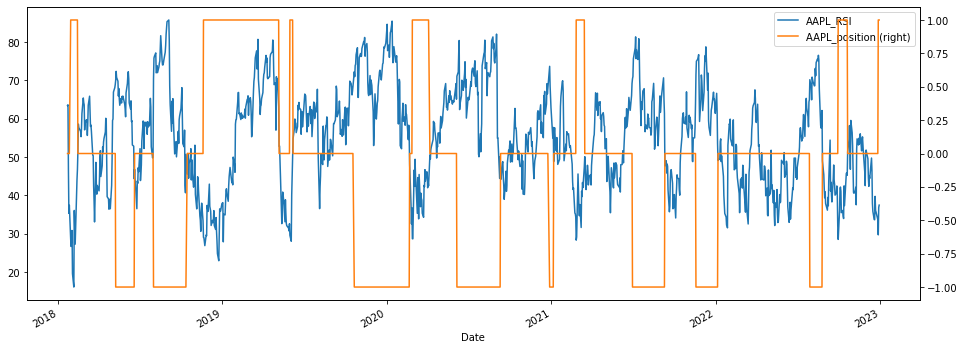

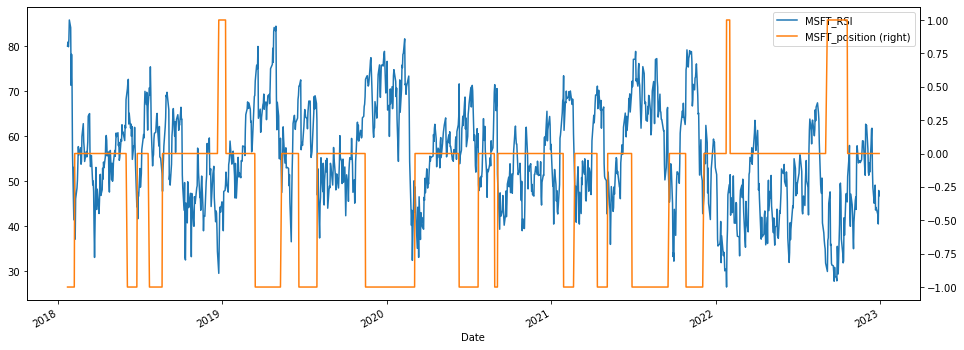

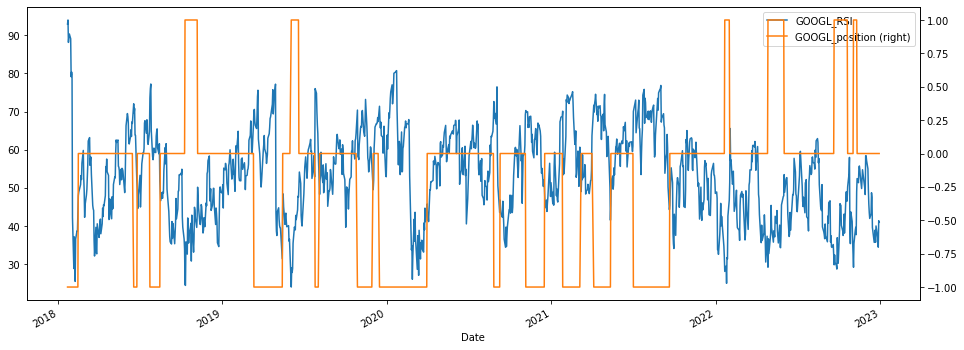

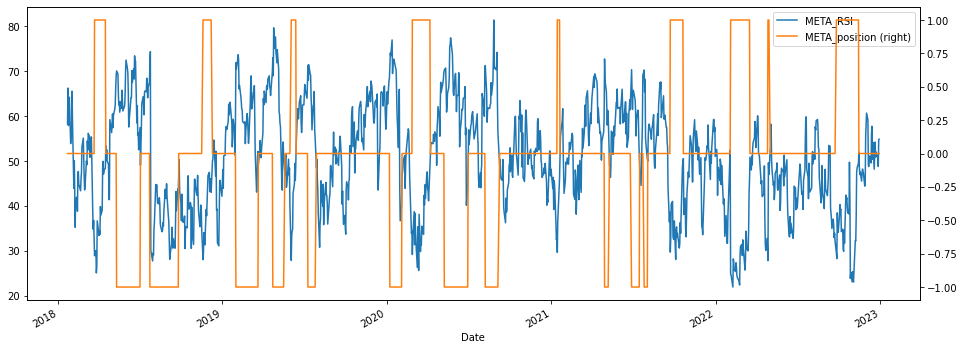

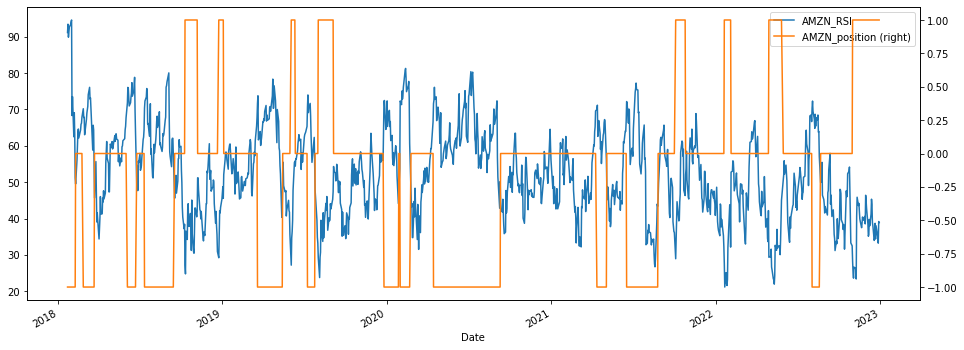

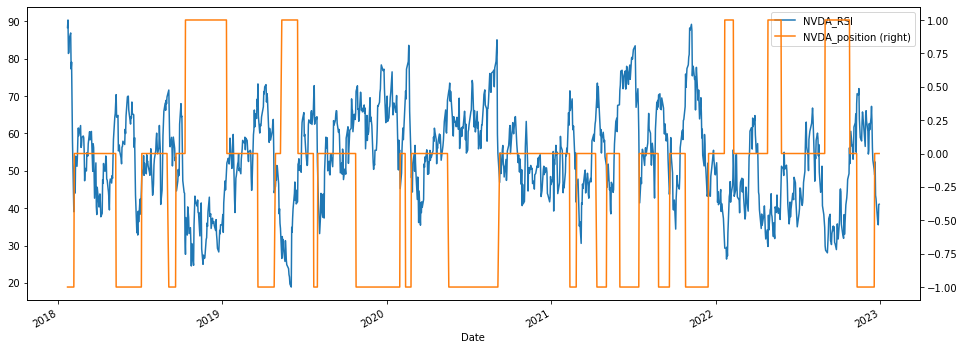

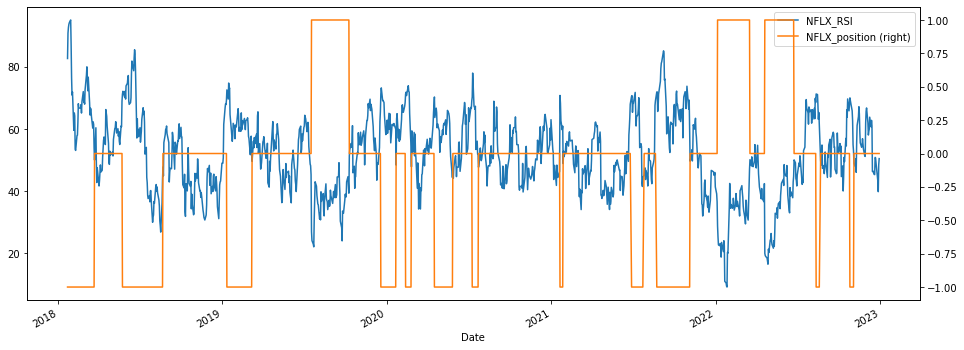

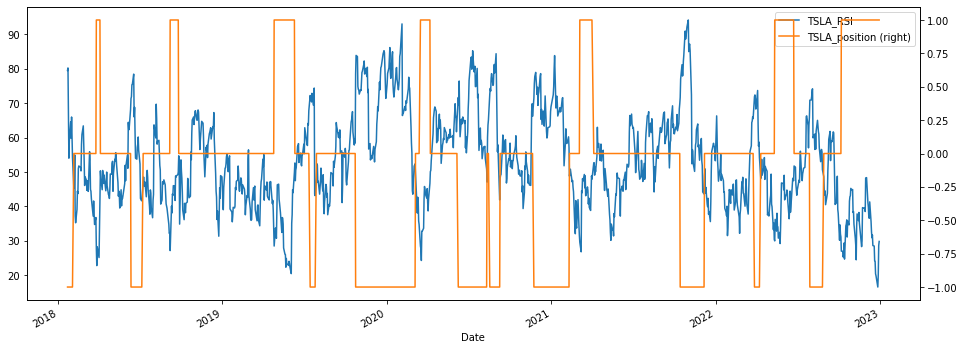

In [27]:
# 시각화
for ticker in tickers:
    ax = rsi_df[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
    ax.get_legend()


< RSI 심화 로직: 다이버전스 개념 적용>
- 주가 움직임 간의 반대 방향 움직임인 다이버전스를 감지하여 포지션 진입 시기를 결정
  (단순히 30,70 도달했다고 포지션 진입X, 다이버전스 발생 시에만 포지션 진입)
- 포지션 종료 시기는 공매도 시 rsi가 30에 진입하면 포지션 종료, 반대로 공매수 시에는 rsi가 70진입하면 포지션 종료로 변경
- 다이버전스는 RSI가 상승하면서 주가가 하락하거나, RSI가 하락하면서 주가가 상승할 때 나타남. 
- 주가가 하락하락하였음에도 이전 하락지점보다 RSI가 더 큰 경우 상승 추세로의 전환을 의미(상승 다이버전스)
- 반대로 주가 상승하였음에도 이전 상승지점보다 RSI가 더 작은 경우 하락 추세로의 전환을 의미(하락 다이버전스) 

In [28]:
# # 위의 기본 로직 적용 시 결측치 제거했더니 ValueError: Length of values (1259) does not match length of index (1246)
# # 에러 발생. 
# # 원본 데이터프레임 백업 한거로 다시 불러오자 
# rsi_df_1=rsi_df_backup
# rsi_df_1 

In [29]:
# data = pd.DataFrame()

In [30]:
# for ticker in tickers:
#     # RSI 계산
#     rsi = RSIIndicator(adj_price_df[ticker]).rsi()
    
#     # 트레이딩 신호 생성
#     long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 매수 신호
#     short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 매도 신호

#     # 포지션 종료 신호 생성
#     exit_long_signal = np.where((rsi >= 25) & (rsi <= 30), -1, 0)  # 매수 포지션 종료 신호
#     exit_short_signal = np.where((rsi <= 75) & (rsi >= 70), 1, 0)  # 매도 포지션 종료 신호

#     # 다이버전스 검출 로직 추가
#     bullish_divergence_signal = np.where(
#         (rsi < 30) & (rsi > 25) & (rsi > rsi.shift(1)) & (adj_price_df[ticker] < adj_price_df[ticker].shift(1)),
#         1, 0
#     )  # 상승 다이버전스 신호
#     bearish_divergence_signal = np.where(
#         (rsi > 70) & (rsi < 75) & (rsi < rsi.shift(1)) & (adj_price_df[ticker] > adj_price_df[ticker].shift(1)),
#         -1, 0
#     )  # 하락 다이버전스 신호
    
#     # 최종 포지션 결정
#     position = long_signal + short_signal
#     position = np.where((position == 0) & (exit_long_signal == -1), 0, position)  # 매수 포지션 종료
#     position = np.where((position == 0) & (exit_short_signal == 1), 0, position)  # 매도 포지션 종료
#     position = position + bullish_divergence_signal + bearish_divergence_signal  # 다이버전스 신호 반영

#     # 결과 저장
#     rsi_df_1[ticker + '_RSI'] = rsi
#     rsi_df_1[ticker + '_position'] = position


In [31]:
####

In [32]:
# # 다이버전스 탐지 함수 
# def find_divergence(df):
#     # 결과를 저장할 리스트 초기화
#     peaks = []
#     troughs = []

#     # 다이버전스를 확인하기 위한 초기 값 설정
#     prev_high_price = prev_low_price = df['Close'][0]
#     prev_high_rsi = prev_low_rsi = df['RSI'][0]
#     prev_peak_date = prev_trough_date = df.index[0]

#     # 각 행마다 반복
#     for index, row in df.iterrows():
#         current_price = row['Close']
#         current_rsi = row['RSI']
#         current_date = index

#         # 고점 다이버전스를 찾는 경우
#         if current_price > prev_high_price and current_rsi < prev_high_rsi:
#             if prev_high_rsi >= 70:  # 과매수 구간 확인
#                 peaks.append({'Date': prev_peak_date, 'Price': prev_high_price, 'RSI': prev_high_rsi})

#         # 저점 다이버전스를 찾는 경우
#         elif current_price < prev_low_price and current_rsi > prev_low_rsi:
#             if prev_low_rsi =< 30:  # 과매도 구간 확인
#                 troughs.append({'Date': prev_trough_date, 'Price': prev_low_price, 'RSI': prev_low_rsi})

#         # 이전 고점과 저점을 현재 행의 값으로 갱신
#         if current_price > prev_high_price or current_rsi > prev_high_rsi:
#             prev_high_price = current_price
#             prev_high_rsi = current_rsi
#             prev_peak_date = current_date

#         if current_price < prev_low_price or current_rsi < prev_low_rsi:
#             prev_low_price = current_price
#             prev_low_rsi = current_rsi
#             prev_trough_date = current_date

#     # 결과 데이터프레임 생성
#     peaks_df = pd.DataFrame(peaks)
#     troughs_df = pd.DataFrame(troughs)
    
#     return peaks_df, troughs_df



In [33]:
# print(peaks_df)


In [34]:
# # 데이터프레임 초기화
# data = pd.DataFrame(index=adj_price_df.index)

# # 각 티커별로 RSI 및 포지션 계산 후 다이버전스 탐지
# for ticker in tickers:
#     # RSI 계산
#     df = pd.DataFrame()
#     df['Close'] = adj_price_df[ticker]
#     df['RSI'] = RSIIndicator(df['Close']).rsi()
    
#     # 초기 포지션 값 설정
#     df['position'] = 0  # 이 부분은 실제 전략에 따라 수정하세요

#     # 다이버전스 탐지
#     peaks_df, troughs_df = find_divergence(df)

#     # 다이버전스 신호를 포지션에 반영
#     for date in peaks_df['Date']:
#         df.loc[date, 'position'] = max(df.loc[date, 'position'], -1)
#     for date in troughs_df['Date']:
#         df.loc[date, 'position'] = min(df.loc[date, 'position'], 1)

#     # 결과 저장
#     data[ticker + '_RSI'] = df['RSI']
#     data[ticker + '_position'] = df['position']

In [35]:
####

In [36]:
# # 그러고 나서 다시 결측치 제거 ㄱㄱ
# rsi_df_1.dropna(inplace=True)
# rsi_df_1
# print(rsi_df_1.to_string())


In [37]:
# # 그리고 다시 시각화
# for ticker in tickers:
#     ax = data[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
#     ax.get_legend()


In [38]:
# # 기본로직 vs 심화로직 포지션 시각화 비교 (ㅅㅂ 왜 똑같이 나오냐)
# # 7행 2열의 서브플롯 생성
# fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(12, 4 * len(tickers)))

# # 각 티커에 대해 rsi_df_1과 rsi_df의 그래프 생성
# for i, ticker in enumerate(tickers):
#     # rsi_df의 그래프 (첫 번째 열)ㅠ
#     ax1 = axes[i, 0]
#     ax1.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
#     ax2 = ax1.twinx()
#     ax2.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
#     ax1.set_ylabel('RSI')
#     ax2.set_ylabel('Position')
#     ax1.set_title(f"{ticker} basic logic")
#     ax1.grid(True)
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')

#     # data의 그래프 (두 번째 열)
#     ax1 = axes[i, 1]
#     ax1.plot(data.index.to_numpy(), data[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
#     ax2 = ax1.twinx()
#     ax2.plot(data.index.to_numpy(), data[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
#     ax1.set_ylabel('RSI')
#     ax2.set_ylabel('Position')
#     ax1.set_title(f"{ticker} advanced logic")
#     ax1.grid(True)
#     ax1.legend(loc='upper left')
#     ax2.legend(loc='upper right')

# plt.tight_layout()
# plt.show()


In [39]:
# is_same = rsi_df.equals(data)
# is_same

# Bollinger Band Strategy

In [40]:
bb_df = pd.DataFrame()


In [41]:
# 각 티커에 대한 볼린저 밴드 계산 및 컬럼 추가
for ticker in tickers:
    
    indicator_bb = ta.volatility.BollingerBands(close=adj_price_df[ticker], window=20, window_dev=2)

    # middle band(20일 이동 평균)
    bb_df[ticker + "_middle_band"] = indicator_bb.bollinger_mavg()

    # upper band
    bb_df[ticker + "_upper_band"] = indicator_bb.bollinger_hband()

    # lower band
    bb_df[ticker + "_lower_band"] = indicator_bb.bollinger_lband()


In [42]:
# 포지션 데이터 입력 및 컬럼 추가
for ticker in tickers:
    # 볼린저 밴드 계산
    indicator_bb = ta.volatility.BollingerBands(close=adj_price_df[ticker], window=20, window_dev=2)

    # 포지션 계산
    # 하단 밴드 이탈 시 매수 포지션 (1)
    # 상단 밴드 이탈 시 매도 포지션 (-1)
    # 중간 밴드 도달 시 포지션 종료 (0)
    bb_df[ticker + '_position'] = 0
    bb_df.loc[adj_price_df[ticker] < indicator_bb.bollinger_lband(), ticker + '_position'] = 1
    bb_df.loc[adj_price_df[ticker] > indicator_bb.bollinger_hband(), ticker + '_position'] = -1
    bb_df.loc[adj_price_df[ticker].between(indicator_bb.bollinger_lband(), indicator_bb.bollinger_hband()), ticker + '_position'] = 0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


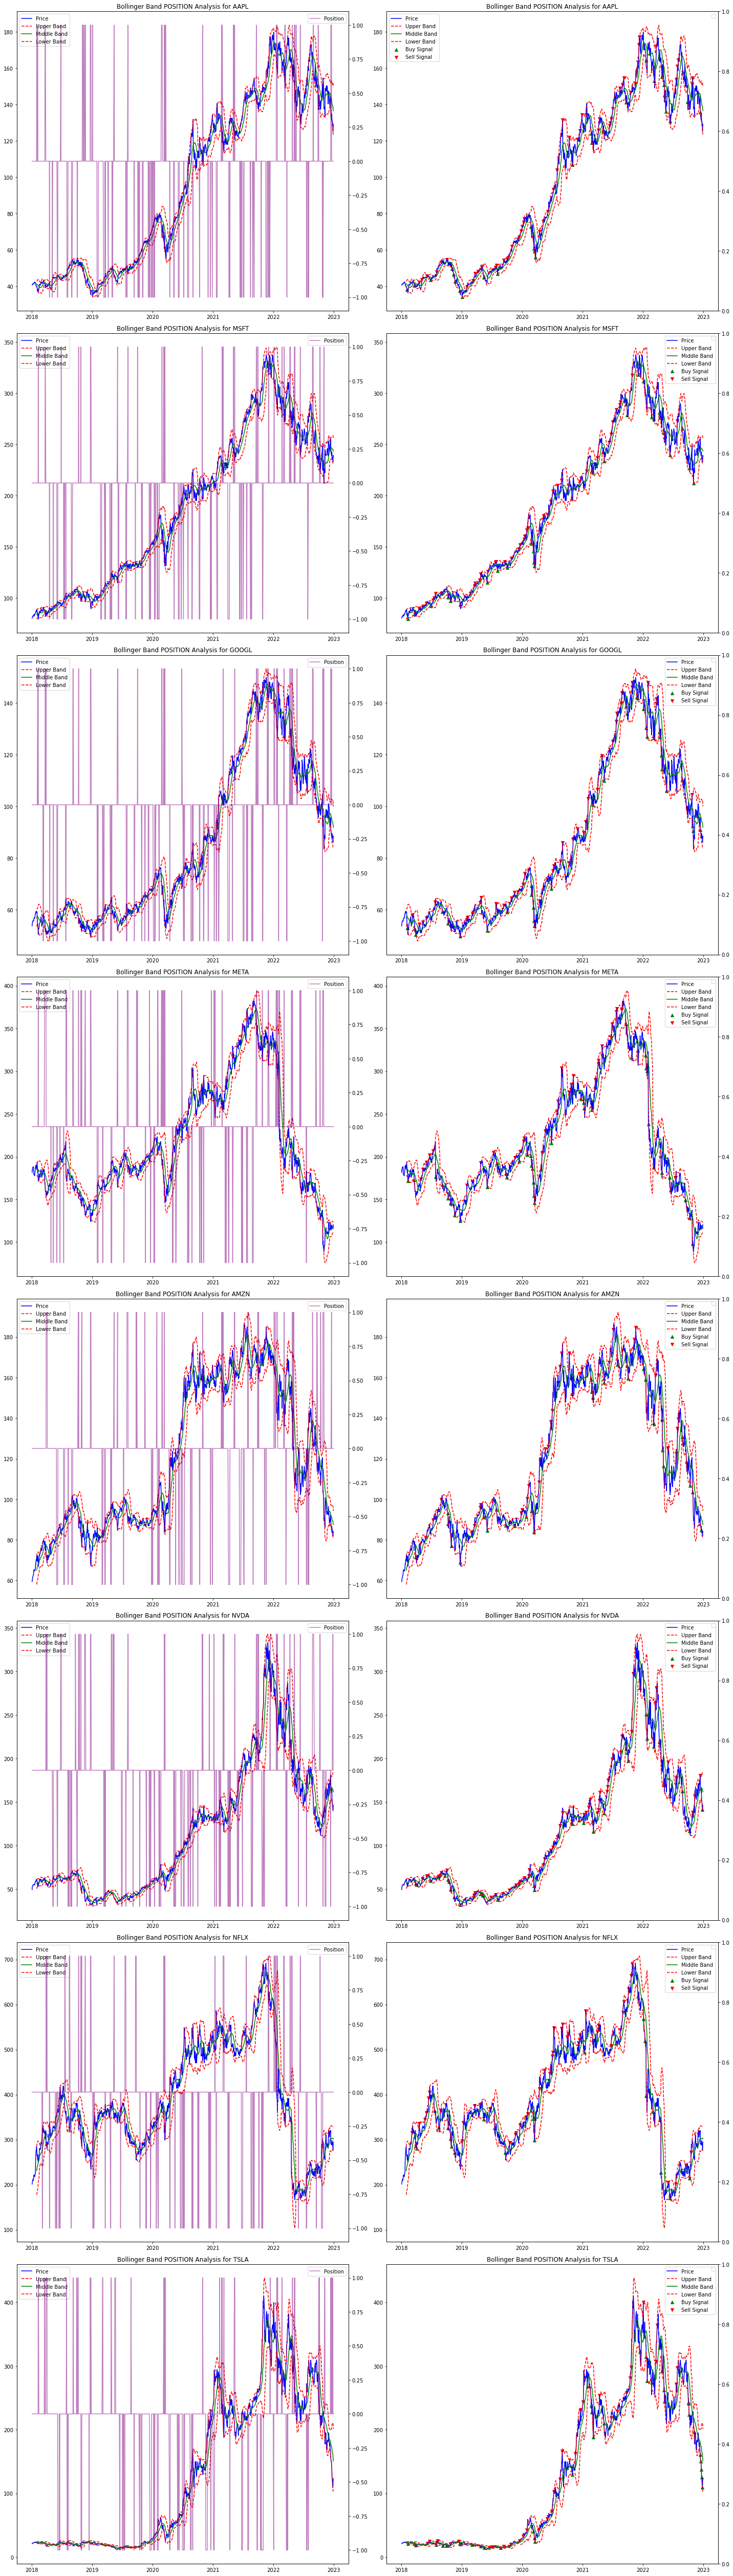

In [43]:
# 7행 2열로 그래프 나누기 #볼벤도 가독성 떨어져 옆에 마커로 표시된 그래프 추가 
fig, axes = plt.subplots(8, 2, figsize=(20, 70))

for i, ticker in enumerate(tickers):
    # 인덱스를 Numpy 배열로 변환
    index_array = bb_df.index.to_numpy()

    # 1열: 포지션 데이터를 포함한 볼린저 밴드 그래프
    ax1 = axes[i, 0]
    ax1.plot(index_array, adj_price_df[ticker].values, label='Price', color='blue')
    ax1.plot(index_array, bb_df[ticker + '_upper_band'].values, label='Upper Band', color='red', linestyle='--')
    ax1.plot(index_array, bb_df[ticker + '_middle_band'].values, label='Middle Band', color='green')
    ax1.plot(index_array, bb_df[ticker + '_lower_band'].values, label='Lower Band', color='red', linestyle='--')
    ax1_2 = ax1.twinx()
    ax1_2.plot(index_array, bb_df[ticker + '_position'].values, label='Position', color='purple', alpha=0.5)
    ax1.set_title(f'Bollinger Band POSITION Analysis for {ticker}')
    ax1.legend(loc='upper left')
    ax1_2.legend(loc='upper right')

    # 2열: 매수 및 매도 신호가 마커로 표시된 볼린저 밴드 그래프
    ax2 = axes[i, 1]
    ax2.plot(index_array, adj_price_df[ticker].values, label='Price', color='blue')
    ax2.plot(index_array, bb_df[ticker + '_upper_band'].values, label='Upper Band', color='red', linestyle='--')
    ax2.plot(index_array, bb_df[ticker + '_middle_band'].values, label='Middle Band', color='green')
    ax2.plot(index_array, bb_df[ticker + '_lower_band'].values, label='Lower Band', color='red', linestyle='--')
    buy_signals = (adj_price_df[ticker].values < bb_df[ticker + '_lower_band'].values) & (np.roll(adj_price_df[ticker].values, 1) >= np.roll(bb_df[ticker + '_lower_band'].values, 1))
    sell_signals = (adj_price_df[ticker].values > bb_df[ticker + '_upper_band'].values) & (np.roll(adj_price_df[ticker].values, 1) <= np.roll(bb_df[ticker + '_upper_band'].values, 1))
    ax2.scatter(index_array[buy_signals], adj_price_df[ticker][buy_signals].values, label='Buy Signal', marker='^', color='green', alpha=1)
    ax2.scatter(index_array[sell_signals], adj_price_df[ticker][sell_signals].values, label='Sell Signal', marker='v', color='red', alpha=1)
    ax2_2 = ax2.twinx()
    
    ax2.set_title(f'Bollinger Band POSITION Analysis for {ticker}')
    ax2.legend()
    ax2_2.legend()

plt.tight_layout()
plt.show()



# Performance Evaluation

- 1) cumulative returns
- 2) 지표별 전략 vs bnh_ratio	
- 3) sharpe_ratio with cagr & volatility
- 4) max_drawdown	
- 5) calmar_ratio

### 1) cumulative Returns(누적 수익률)

- SMA

In [44]:

for ticker in tickers:
    # 일일 백분율 변화 계산
    sma_df[ticker+'_ret'] = sma_df[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    sma_df[ticker+'_ret'] = sma_df[ticker+'_ret'] * sma_df[ticker + '_position'].shift(1)

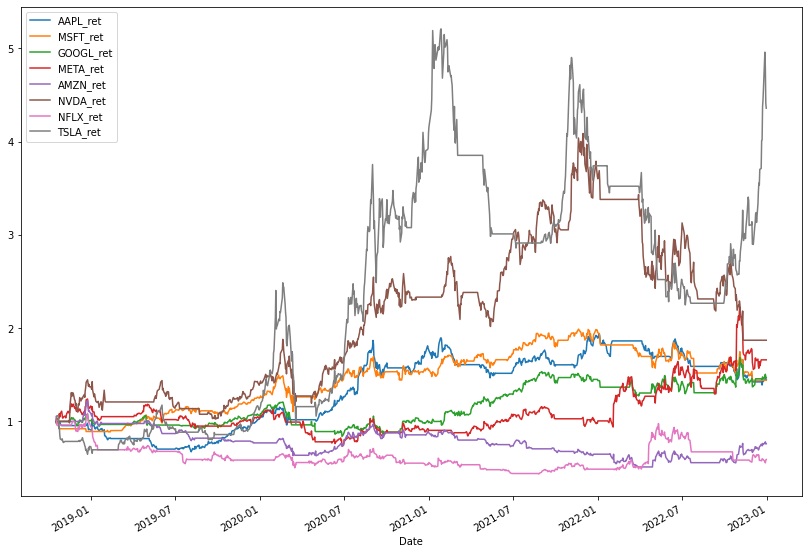

In [45]:
#sma전략 누적수익률 시각화 
ax = (1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- MACD

In [46]:
for ticker in tickers:
    # 일일 백분율 변화 계산
    macd_df[ticker+'_ret'] = macd_df[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    macd_df[ticker+'_ret'] = macd_df[ticker+'_ret'] * macd_df[ticker + '_position'].shift(1)

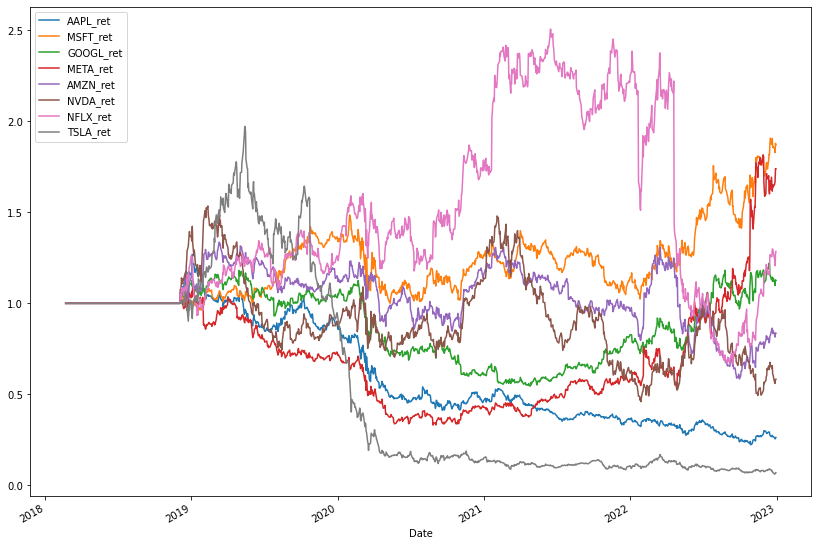

In [47]:
ax = (1 + macd_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- RSI

In [48]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')

In [49]:
#rsi for performance evaluation
for ticker in tickers:
    # 일일 백분율 변화를 계산
    rsi_df[ticker+'_ret'] = combined_df[ticker].pct_change()

    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    rsi_df[ticker+'_ret'] = rsi_df[ticker+'_ret'] * rsi_df[ticker + '_position'].shift(1)


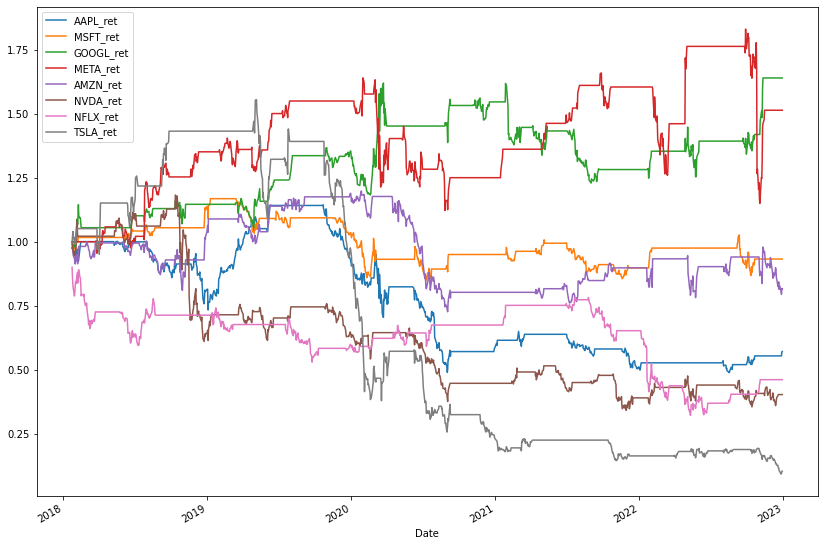

In [50]:
#rsi전략 성과 시각화 
ax = (1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

- Bollinger Band

In [51]:
combined_df1 = pd.merge(bb_df, adj_price_df, on='Date')

In [52]:
for ticker in tickers:
    # 일일 백분율 변화 계산
    bb_df[ticker+'_ret'] = combined_df1[ticker].pct_change()
    # 계산된 수익률을 전날의 포지션 값에 따라 조정
    bb_df[ticker+'_ret'] = bb_df[ticker+'_ret'] * bb_df[ticker + '_position'].shift(1)

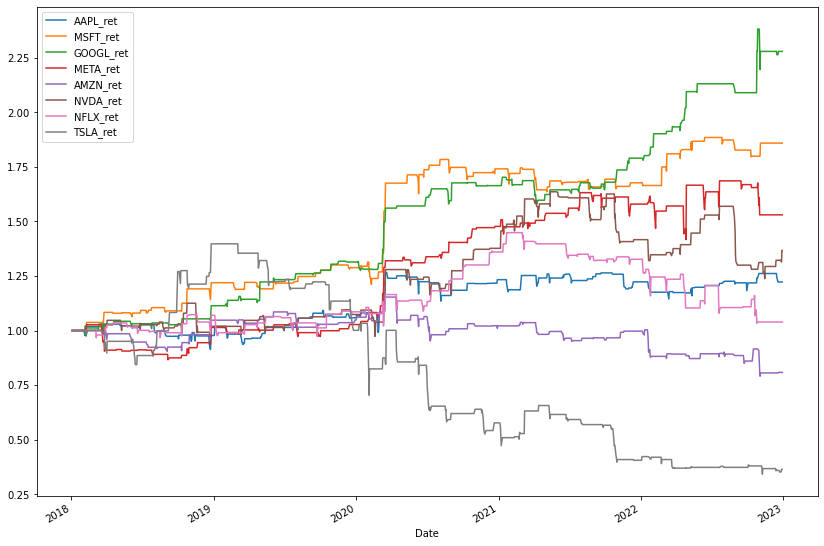

In [53]:
#bb전략 성과 시각화 
ax = (1 + bb_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

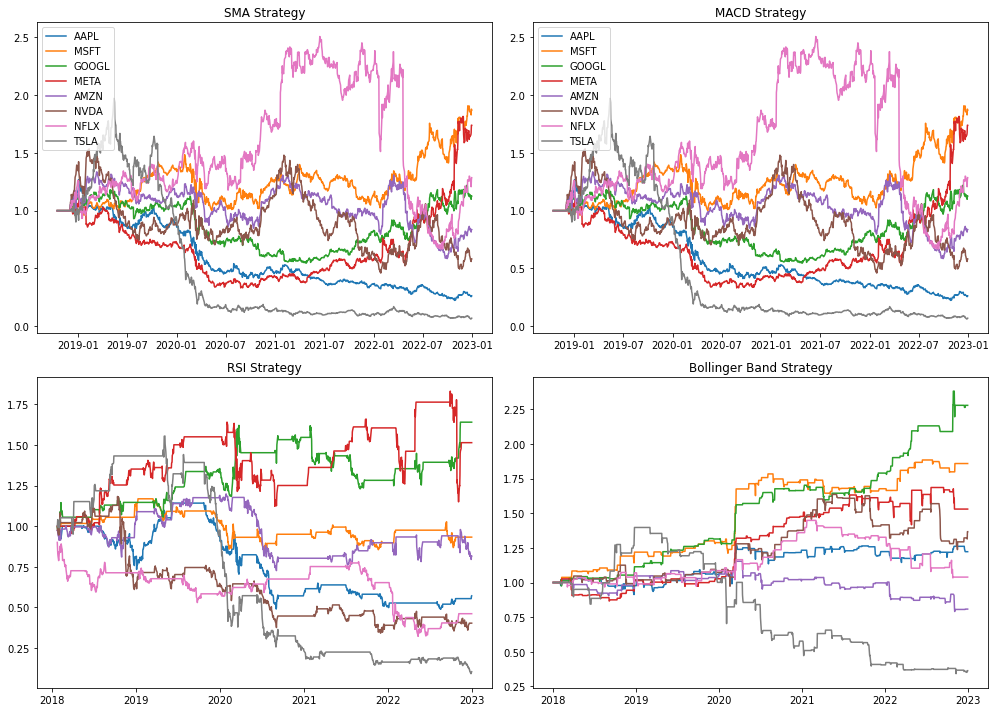

In [128]:
#4개 지표별 누적 수익률 그래프 서브 플롯으로 비교 

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# SMA 
axs[0, 0].plot((1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[0, 0].set_title('SMA Strategy')
axs[0, 0].legend(sma_df.columns)

# MACD 
axs[0, 1].plot((1 + macd_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[0, 1].set_title('MACD Strategy')
axs[0, 1].legend(macd_df.columns)

# RSI 
axs[1, 0].plot((1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[1, 0].set_title('RSI Strategy')
axs[1, 0].get_legend()

# Bollinger Band 
axs[1, 1].plot((1 + bb_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod())
axs[1, 1].set_title('Bollinger Band Strategy')
axs[1, 1].get_legend()

plt.tight_layout()
plt.show()


- 4개 지표 전략 누적수익률 한 눈에  비교 

/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/Users/myeongjinlee/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:2247: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


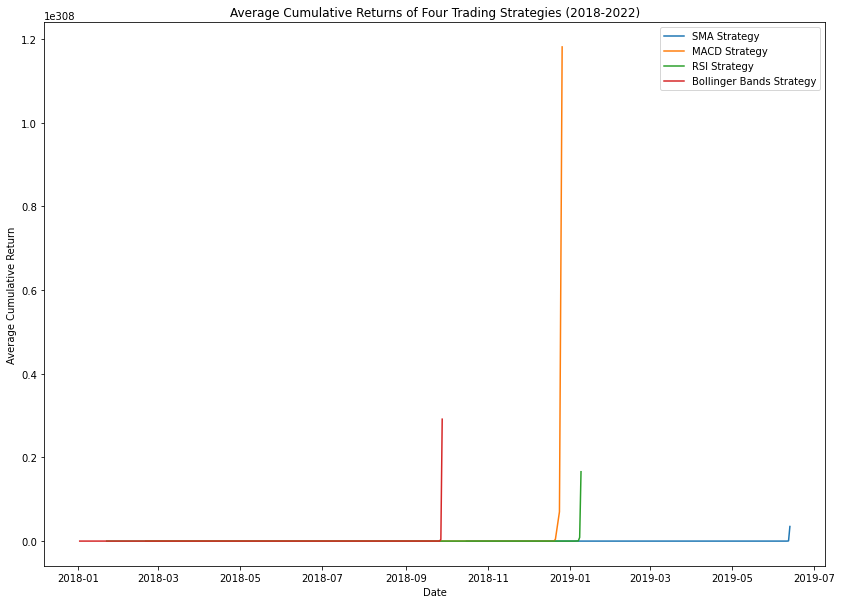

In [55]:
# 날짜 범위 설정
start_date = '2018-01-01'
end_date = '2022-12-31'

# 각 전략별 데이터프레임에서 해당 날짜 범위에 맞게 데이터 필터링
sma_df_filtered = sma_df.loc[start_date:end_date]
macd_df_filtered = macd_df.loc[start_date:end_date]
rsi_df_filtered = rsi_df.loc[start_date:end_date]
bb_df_filtered = bb_df.loc[start_date:end_date]

# 필터링된 데이터를 사용하여 각 전략별 평균 일일 수익률 계산
sma_mean_ret = sma_df_filtered.mean(axis=1)
macd_mean_ret = macd_df_filtered.mean(axis=1)
rsi_mean_ret = rsi_df_filtered.mean(axis=1)
bb_mean_ret = bb_df_filtered.mean(axis=1)

# 각 전략별 평균 누적 수익률 계산
sma_cum_ret = (1 + sma_mean_ret).cumprod()
macd_cum_ret = (1 + macd_mean_ret).cumprod()
rsi_cum_ret = (1 + rsi_mean_ret).cumprod()
bb_cum_ret = (1 + bb_mean_ret).cumprod()

# 시각화
plt.figure(figsize=(14, 10))
plt.plot(sma_cum_ret, label='SMA Strategy')
plt.plot(macd_cum_ret, label='MACD Strategy')
plt.plot(rsi_cum_ret, label='RSI Strategy')
plt.plot(bb_cum_ret, label='Bollinger Bands Strategy')

plt.title('Average Cumulative Returns of Four Trading Strategies (2018-2022)')
plt.xlabel('Date')
plt.ylabel('Average Cumulative Return')
plt.legend()
plt.show()


### 지표 별 전략 vs Buy & Hold Strategy

In [56]:
def bnh_ratio(DF, ticker):
    "calculate relative performance of the strategy versus buy & hold strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_return_bnh'] = (1 + df['return']).cumprod()
    return df.iloc[-1]['cum_return'] / df.iloc[-1]['cum_return_bnh']

- sma

In [57]:
# sma 전략성과
for ticker in tickers:
    print("SMA performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(sma_df, ticker)))

SMA performance relative to B&H strategy on AAPL is 0.594349200895707
SMA performance relative to B&H strategy on MSFT is 0.6365102176411009
SMA performance relative to B&H strategy on GOOGL is 0.9419310822446606
SMA performance relative to B&H strategy on META is 2.190333530817603
SMA performance relative to B&H strategy on AMZN is 0.8238017101571149
SMA performance relative to B&H strategy on NVDA is 0.7800112120559457
SMA performance relative to B&H strategy on NFLX is 0.6961762095577345
SMA performance relative to B&H strategy on TSLA is 0.6521796412599108


Text(0, 0.5, 'Performance Ratio')

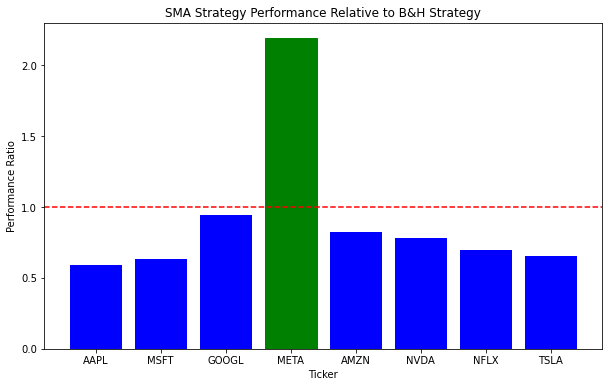

In [58]:
#sma vs bnh 시각화 

performance_ratios = {}

for ticker in tickers:
    performance_ratios[ticker] = bnh_ratio(sma_df, ticker)

ratios = list(performance_ratios.values())

# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue')

# 1을 기준으로 선을 그려 SMA 전략이 B&H 전략보다 더 나은지 여부 표시
plt.axhline(y=1, color='red', linestyle='--')


for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('SMA Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')

- macd

In [59]:
# macd 전략성과
for ticker in tickers:
    print("MACD performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(macd_df, ticker)))

MACD performance relative to B&H strategy on AAPL is 0.08286209026762528
MACD performance relative to B&H strategy on MSFT is 0.6840779050393409
MACD performance relative to B&H strategy on GOOGL is 0.7044671262474
MACD performance relative to B&H strategy on META is 2.544055852447161
MACD performance relative to B&H strategy on AMZN is 0.7307795276979127
MACD performance relative to B&H strategy on NVDA is 0.2457283323039426
MACD performance relative to B&H strategy on NFLX is 1.2143599093523871
MACD performance relative to B&H strategy on TSLA is 0.012473244462496393


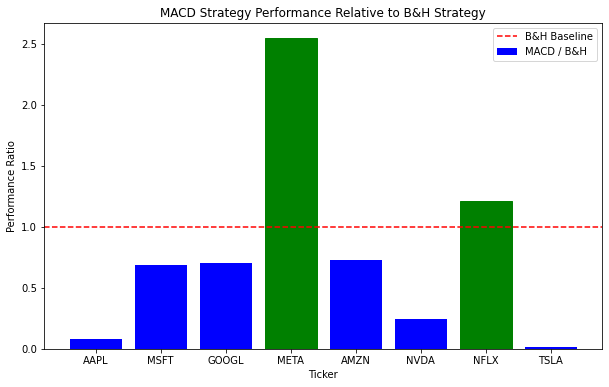

In [60]:
# macd vs bnh 시각화 
performance_ratios_1 = {}

for ticker in tickers:
    performance_ratios_1[ticker] = bnh_ratio(macd_df, ticker)

ratios = list(performance_ratios_1.values())


# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='MACD / B&H')

# 1을 기준으로 선을 그려 macd 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('MACD Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')


plt.legend()


plt.show()


- rsi

In [61]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')


In [62]:
#rsi 전략성과 
for ticker in tickers:
    print("RSI performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df, ticker)))

RSI performance relative to B&H strategy on AAPL is 0.1849716639567551
RSI performance relative to B&H strategy on MSFT is 0.3354467676251715
RSI performance relative to B&H strategy on GOOGL is 1.0819954377052081
RSI performance relative to B&H strategy on META is 2.3320678072316836
RSI performance relative to B&H strategy on AMZN is 0.6448708587969011
RSI performance relative to B&H strategy on NVDA is 0.1594867554631349
RSI performance relative to B&H strategy on NFLX is 0.35596042401424993
RSI performance relative to B&H strategy on TSLA is 0.019790010521721104


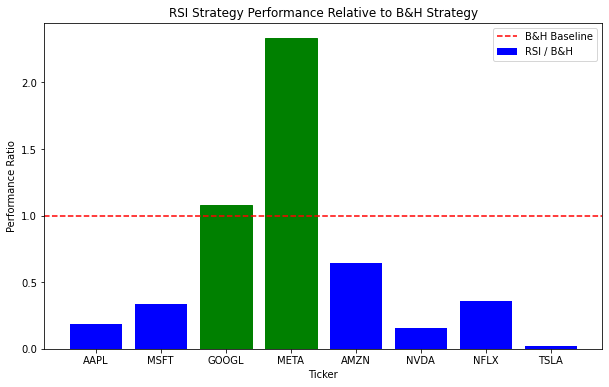

In [63]:
# rsi vs bnh 시각화 
performance_ratios_2 = {}

for ticker in tickers:
    performance_ratios_2[ticker] = bnh_ratio(combined_df, ticker)

ratios = list(performance_ratios_2.values())


# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='RSI / B&H')

# 1을 기준으로 선을 그려 rsi 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('RSI Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')


plt.legend()


plt.show()

- bollinger bands

In [64]:
#bb_df에 종가 데이터 빠져있어서 추가 
combined_df1 = pd.merge(bb_df, adj_price_df, on='Date')


In [65]:
#bollinger bands 전략성과 
for ticker in tickers:
    print("BOLLINGER BANDS performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df1, ticker)))

BOLLINGER BANDS performance relative to B&H strategy on AAPL is 0.3853526731913345
BOLLINGER BANDS performance relative to B&H strategy on MSFT is 0.6275061336137039
BOLLINGER BANDS performance relative to B&H strategy on GOOGL is 1.3863478401102909
BOLLINGER BANDS performance relative to B&H strategy on META is 2.3071479288254526
BOLLINGER BANDS performance relative to B&H strategy on AMZN is 0.5719530531975688
BOLLINGER BANDS performance relative to B&H strategy on NVDA is 0.4616078571197999
BOLLINGER BANDS performance relative to B&H strategy on NFLX is 0.7085651996132329
BOLLINGER BANDS performance relative to B&H strategy on TSLA is 0.0630565229924951


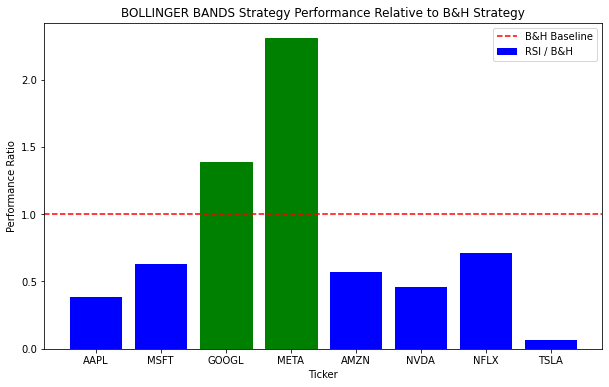

In [66]:
# bollinger bands vs bnh 시각화 
performance_ratios_3 = {}

for ticker in tickers:
    performance_ratios_3[ticker] = bnh_ratio(combined_df1, ticker)

ratios = list(performance_ratios_3.values())


# 성능 비율 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color='blue', label='RSI / B&H')

# 1을 기준으로 선을 그려 rsi 전략이 B&H 전략보다 더 나은지 여부를 표시
plt.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')

# 성능 비율이 1보다 큰 경우, 해당 바의 색상을 변경
for bar, ratio in zip(bars, ratios):
    if ratio > 1:
        bar.set_color('green')

plt.title('BOLLINGER BANDS Strategy Performance Relative to B&H Strategy')
plt.xlabel('Ticker')
plt.ylabel('Performance Ratio')


plt.legend()


plt.show()

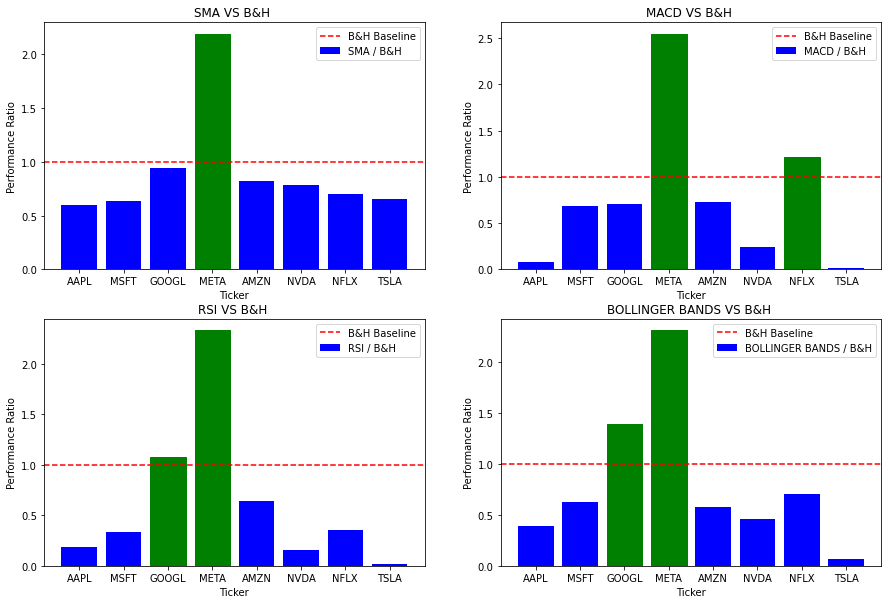

In [67]:
# 4개 지표 별 전략 vs Buy & Hold Strategy 서브플롯 


ratios = list(performance_ratios.values())
tickers = list(performance_ratios.keys())
ratios = list(performance_ratios_1.values())
tickers = list(performance_ratios_1.keys())
ratios = list(performance_ratios_2.values())
tickers = list(performance_ratios_2.keys())
ratios = list(performance_ratios_3.values())
tickers = list(performance_ratios_3.keys())

# 2행 2열 
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

def plot_bar_chart(ax, performance_ratios, title, label):
    ratios = list(performance_ratios.values())
    bars = ax.bar(tickers, ratios, color='blue', label=label)
    ax.axhline(y=1, color='red', linestyle='--', label='B&H Baseline')
    for bar, ratio in zip(bars, ratios):
        if ratio > 1:
            bar.set_color('green')
    ax.set_title(title)
    ax.set_xlabel('Ticker')
    ax.set_ylabel('Performance Ratio')
    ax.legend()


plot_bar_chart(axs[0, 0], performance_ratios, 'SMA VS B&H ', 'SMA / B&H')

plot_bar_chart(axs[0, 1], performance_ratios_1, 'MACD VS B&H ', 'MACD / B&H')

plot_bar_chart(axs[1, 0], performance_ratios_2, 'RSI VS B&H ', 'RSI / B&H')

plot_bar_chart(axs[1, 1], performance_ratios_3, 'BOLLINGER BANDS VS B&H ', 'BOLLINGER BANDS / B&H')


- 4개 지표 전략 vs bnh 한 눈에 비교

In [68]:
# 지표 별 성능 비율의 평균 계산

average_performance = sum(performance_ratios.values()) / len(performance_ratios)
print("Average Performance of SMA Strategy: ", average_performance)

average_performance1 = sum(performance_ratios_1.values()) / len(performance_ratios_1)
print("Average Performance of MACD Strategy: ", average_performance1)

average_performance2 = sum(performance_ratios_2.values()) / len(performance_ratios_2)
print("Average Performance of RSI Strategy: ", average_performance2)

average_performance3 = sum(performance_ratios_3.values()) / len(performance_ratios_3)
print("Average Performance of Bollinger Bands Strategy: ", average_performance3)

Average Performance of SMA Strategy:  0.9144116005787222
Average Performance of MACD Strategy:  0.7773504984772833
Average Performance of RSI Strategy:  0.6393237156643531
Average Performance of Bollinger Bands Strategy:  0.8139421510829848


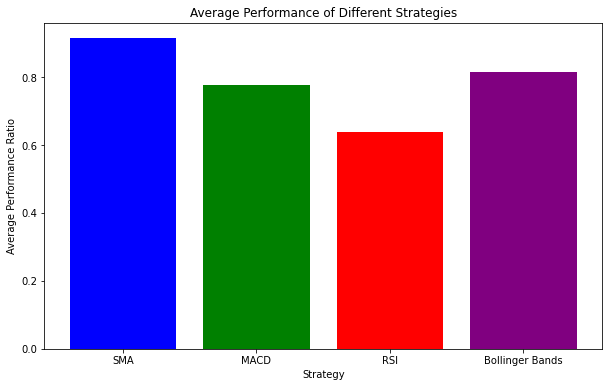

In [69]:
average_performances_0 = {
    'SMA': average_performance,
    'MACD': average_performance1,
    'RSI': average_performance2,
    'Bollinger Bands': average_performance3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_performances_0.keys(), average_performances_0.values(), color=['blue', 'green', 'red', 'purple'])

plt.title('Average Performance of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()


### Sharpe Ratio

In [70]:
# 시간 지남에 따른 투자 성장률 
def CAGR(DF, ticker):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    n = len(df) / 250
    CAGR = (df.iloc[-1]['cum_return']) ** (1 / n) - 1
    return CAGR

In [71]:
#sma cagr
for ticker in tickers:
    print("CAGR of SMA strategy on {} = {}".format(ticker, CAGR(sma_df, ticker)))

CAGR of SMA strategy on AAPL = 0.09081877301373509
CAGR of SMA strategy on MSFT = 0.09010558622726461
CAGR of SMA strategy on GOOGL = 0.09457727440928632
CAGR of SMA strategy on META = 0.1269798320680764
CAGR of SMA strategy on AMZN = -0.06254484700474505
CAGR of SMA strategy on NVDA = 0.15913184445298056
CAGR of SMA strategy on NFLX = -0.11608207628310674
CAGR of SMA strategy on TSLA = 0.414965364709202


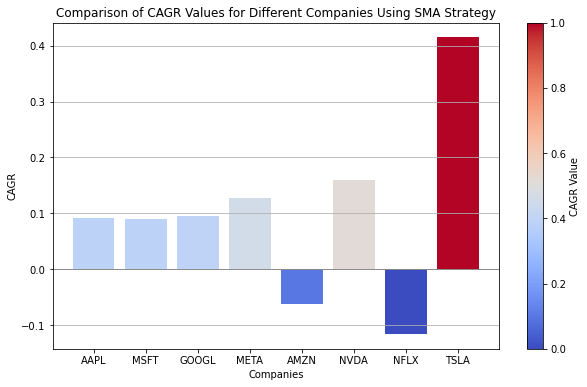

In [72]:
#sma cagr 시각화
cagr_ratios = {}

for ticker in tickers:
    cagr_ratios[ticker] = CAGR(sma_df, ticker)

ratios = list(cagr_ratios.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using SMA Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')


sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

In [73]:
#macd cagr
for ticker in tickers:
    print("CAGR of MACD strategy on {} = {}".format(ticker, CAGR(macd_df, ticker)))

CAGR of MACD strategy on AAPL = -0.238727128558751
CAGR of MACD strategy on MSFT = 0.1361534216458471
CAGR of MACD strategy on GOOGL = 0.02457148281293864
CAGR of MACD strategy on META = 0.11949218374713633
CAGR of MACD strategy on AMZN = -0.035840538139012446
CAGR of MACD strategy on NVDA = -0.10432346697313277
CAGR of MACD strategy on NFLX = 0.052555548498957716
CAGR of MACD strategy on TSLA = -0.42054073779849266


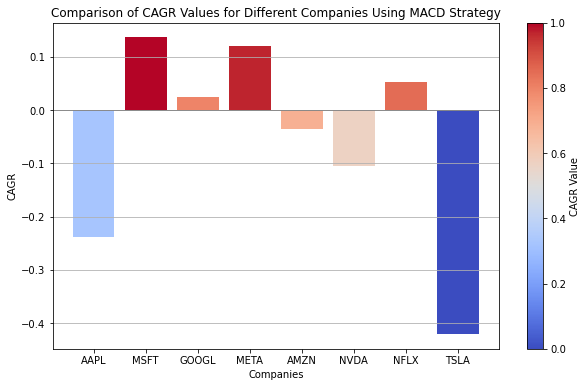

In [74]:
#macd cagr 시각화
cagr_ratios1 = {}

for ticker in tickers:
    cagr_ratios1[ticker] = CAGR(macd_df, ticker)

ratios = list(cagr_ratios1.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using MACD Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')

# Add color legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

In [75]:
#rsi cagr
for ticker in tickers:
    print("CAGR of RSI strategy on {} = {}".format(ticker, CAGR(combined_df, ticker)))

CAGR of RSI strategy on AAPL = -0.10628893840092635
CAGR of RSI strategy on MSFT = -0.013925204442024275
CAGR of RSI strategy on GOOGL = 0.10435769225789393
CAGR of RSI strategy on META = 0.08677086604106976
CAGR of RSI strategy on AMZN = -0.039924673625526874
CAGR of RSI strategy on NVDA = -0.16668324273218416
CAGR of RSI strategy on NFLX = -0.1438166015143466
CAGR of RSI strategy on TSLA = -0.36498421542174886


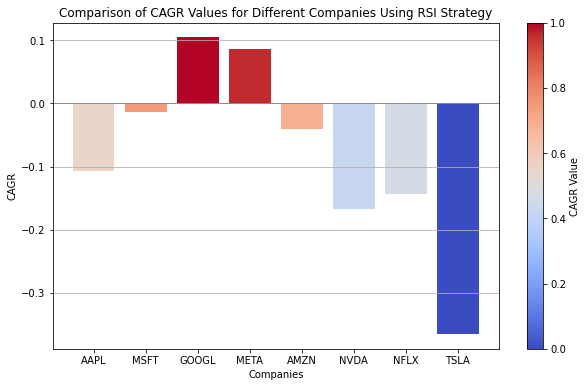

In [76]:
#rsi cagr 시각화 
cagr_ratios2 = {}

for ticker in tickers:
    cagr_ratios2[ticker] = CAGR(combined_df, ticker)

ratios = list(cagr_ratios2.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using RSI Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

In [77]:
#bollinger bands cagr 
for ticker in tickers:
    print("CAGR of RSI strategy on {} = {}".format(ticker, CAGR(combined_df1, ticker)))

CAGR of RSI strategy on AAPL = 0.04072718337111114
CAGR of RSI strategy on MSFT = 0.13105191065401733
CAGR of RSI strategy on GOOGL = 0.17775555605423676
CAGR of RSI strategy on META = 0.0881677368175382
CAGR of RSI strategy on AMZN = -0.04141837184142849
CAGR of RSI strategy on NVDA = 0.06410317788998188
CAGR of RSI strategy on NFLX = 0.0076546783195801105
CAGR of RSI strategy on TSLA = -0.18204968960752899


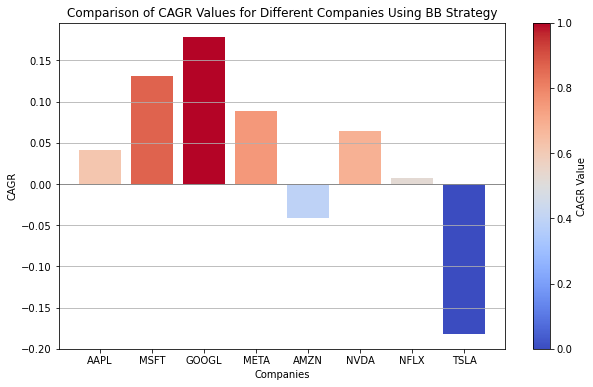

In [78]:
#bollinger bands 시각화 
cagr_ratios3 = {}

for ticker in tickers:
    cagr_ratios3[ticker] = CAGR(combined_df1, ticker)

ratios = list(cagr_ratios3.values())

colors = []
normalized_ratios = [(x - min(ratios)) / (max(ratios) - min(ratios)) for x in ratios]
cmap = plt.get_cmap("coolwarm")

for ratio in normalized_ratios:
    color = cmap(ratio)
    colors.append(color)

plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, ratios, color=colors)
plt.xlabel('Companies')
plt.ylabel('CAGR')
plt.title('Comparison of CAGR Values for Different Companies Using BB Strategy')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')


sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, orientation='vertical', label='CAGR Value')

plt.show()

- 4개 지표 전략 cagr 한 눈에 비교

In [79]:
average_cagr = sum(cagr_ratios.values()) / len(cagr_ratios)
print("Average CAGR of SMA Strategy: ", average_cagr)

average_cagr1 = sum(cagr_ratios1.values()) / len(cagr_ratios1)
print("Average CAGR of MACD Strategy: ", average_cagr1)

average_cagr2 = sum(cagr_ratios2.values()) / len(cagr_ratios2)
print("Average CAGR of RSI Strategy: ", average_cagr2)

average_cagr3 = sum(cagr_ratios3.values()) / len(cagr_ratios3)
print("Average CAGR of Bollinger Bands Strategy: ", average_cagr3)

Average CAGR of SMA Strategy:  0.09974396894908664
Average CAGR of MACD Strategy:  -0.05833240434556364
Average CAGR of RSI Strategy:  -0.08056178972972418
Average CAGR of Bollinger Bands Strategy:  0.035749022707188494


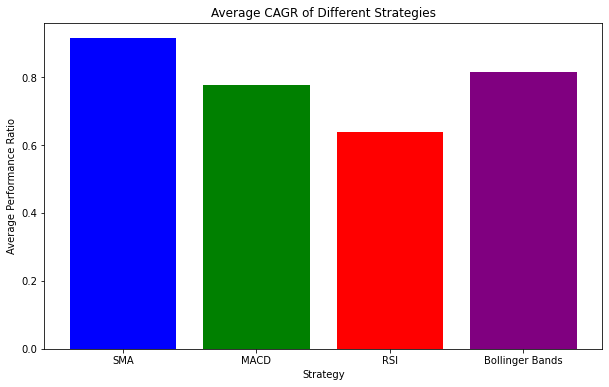

In [80]:
average_cagr_0 = {
    'SMA': average_cagr,
    'MACD': average_cagr1,
    'RSI': average_cagr2,
    'Bollinger Bands': average_cagr3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_cagr_0.keys(), average_performances_0.values(), color=['blue', 'green', 'red', 'purple'])

plt.title('Average CAGR of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()

In [81]:
#투자 수익의 변동성 or 위험성
def volatility(DF, ticker):
    "function to calculate annualized Volatility of a trading strategy"
    df = DF.copy()
    vol = df[ticker+'_ret'].std() * np.sqrt(250)
    return vol

In [82]:
#sma volatility
for ticker in tickers:
    print("Volatility for SMA strategy on {} = {}".format(ticker, volatility(sma_df, ticker)))

Volatility for SMA strategy on AAPL = 0.25532987481853214
Volatility for SMA strategy on MSFT = 0.2530757586153025
Volatility for SMA strategy on GOOGL = 0.24858801304067066
Volatility for SMA strategy on META = 0.3701675649465651
Volatility for SMA strategy on AMZN = 0.2997746376897314
Volatility for SMA strategy on NVDA = 0.4438061710062268
Volatility for SMA strategy on NFLX = 0.3961691603420744
Volatility for SMA strategy on TSLA = 0.5491475546671586


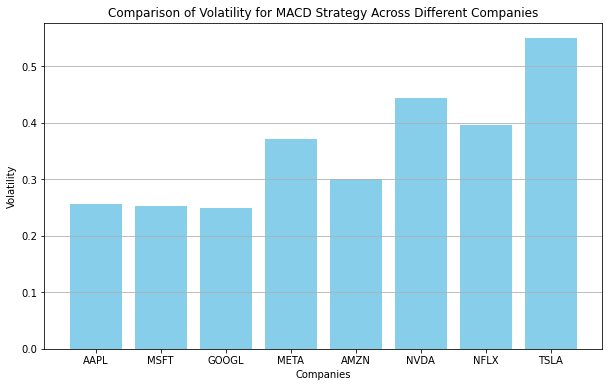

In [83]:
#sma voltility 시각화 
volatility_ratios = {}

for ticker in tickers:
    volatility_ratios[ticker] = volatility(sma_df, ticker)

ratios = list(volatility_ratios.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='skyblue')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for MACD Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [84]:
#macd volatility
for ticker in tickers:
    print("Volatility for MACD strategy on {} = {}".format(ticker, volatility(macd_df, ticker)))

Volatility for MACD strategy on AAPL = 0.3170081589031692
Volatility for MACD strategy on MSFT = 0.29126561794388495
Volatility for MACD strategy on GOOGL = 0.2942362267129507
Volatility for MACD strategy on META = 0.40634039031008345
Volatility for MACD strategy on AMZN = 0.3305787791708019
Volatility for MACD strategy on NVDA = 0.48000701858811823
Volatility for MACD strategy on NFLX = 0.44082037297391247
Volatility for MACD strategy on TSLA = 0.6124460470713994


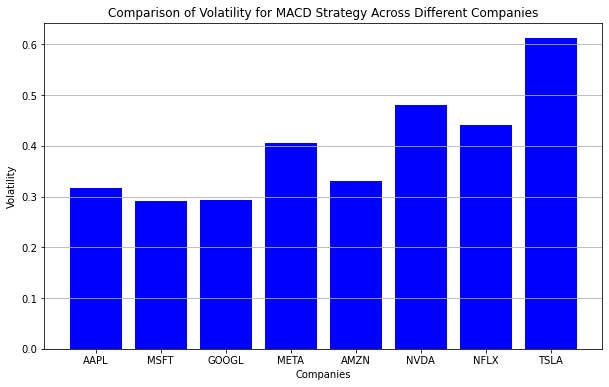

In [85]:
#macd volatility 시각화

volatility_ratios1 = {}

for ticker in tickers:
    volatility_ratios1[ticker] = volatility(macd_df, ticker)

ratios = list(volatility_ratios1.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='blue')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for MACD Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [86]:
#rsi volatility
for ticker in tickers:
    print("Volatility for RSI strategy on {} = {}".format(ticker, volatility(combined_df, ticker)))

Volatility for RSI strategy on AAPL = 0.23842185857927048
Volatility for RSI strategy on MSFT = 0.14339974868542338
Volatility for RSI strategy on GOOGL = 0.1961648414966094
Volatility for RSI strategy on META = 0.2827717465513099
Volatility for RSI strategy on AMZN = 0.2303501189500658
Volatility for RSI strategy on NVDA = 0.33185692351572166
Volatility for RSI strategy on NFLX = 0.27302693179139537
Volatility for RSI strategy on TSLA = 0.46045996897392294


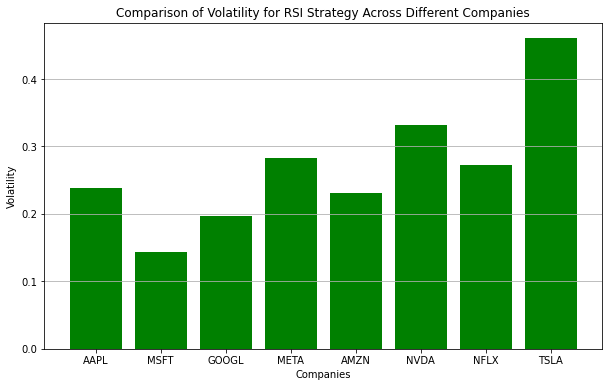

In [87]:
#rsi volatility 시각화

volatility_ratios2 = {}

for ticker in tickers:
    volatility_ratios2[ticker] = volatility(combined_df, ticker)

ratios = list(volatility_ratios2.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='green')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for RSI Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [88]:
# bb volatility 
for ticker in tickers:
    print("Volatility for BOLLINGER BANDS strategy on {} = {}".format(ticker, volatility(combined_df1, ticker)))

Volatility for BOLLINGER BANDS strategy on AAPL = 0.12714950442395762
Volatility for BOLLINGER BANDS strategy on MSFT = 0.12639471009845904
Volatility for BOLLINGER BANDS strategy on GOOGL = 0.11315429395838504
Volatility for BOLLINGER BANDS strategy on META = 0.15364521942007378
Volatility for BOLLINGER BANDS strategy on AMZN = 0.11861690047386822
Volatility for BOLLINGER BANDS strategy on NVDA = 0.1743443615902671
Volatility for BOLLINGER BANDS strategy on NFLX = 0.15783483633518214
Volatility for BOLLINGER BANDS strategy on TSLA = 0.29609890141479905


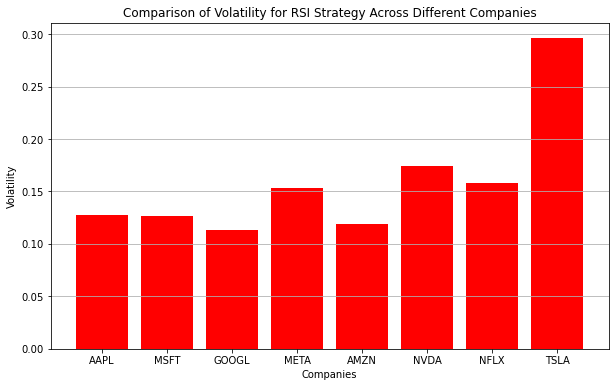

In [89]:
#bb volatility 시각화

volatility_ratios3 = {}

for ticker in tickers:
    volatility_ratios3[ticker] = volatility(combined_df1, ticker)

ratios = list(volatility_ratios3.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='red')
plt.xlabel('Companies')
plt.ylabel('Volatility')
plt.title('Comparison of Volatility for RSI Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

- 4개 지표 전략 volatility 한 눈에 비교

In [90]:
average_volatility = sum(volatility_ratios.values()) / len(volatility_ratios)
print("Average VOLATILITY of SMA Strategy: ", average_volatility)

average_volatility1 = sum(volatility_ratios1.values()) / len(volatility_ratios1)
print("Average VOLATILITY of MACD Strategy: ", average_volatility1)

average_volatility2 = sum(volatility_ratios2.values()) / len(volatility_ratios2)
print("Average VOLATILITY of RSI Strategy: ", average_volatility2)

average_volatility3 = sum(volatility_ratios3.values()) / len(volatility_ratios3)
print("Average VOLATILITY of Bollinger Bands Strategy: ", average_volatility3)

Average VOLATILITY of SMA Strategy:  0.3520073418907827
Average VOLATILITY of MACD Strategy:  0.39658782645929
Average VOLATILITY of RSI Strategy:  0.26955651731796487
Average VOLATILITY of Bollinger Bands Strategy:  0.158404840964374


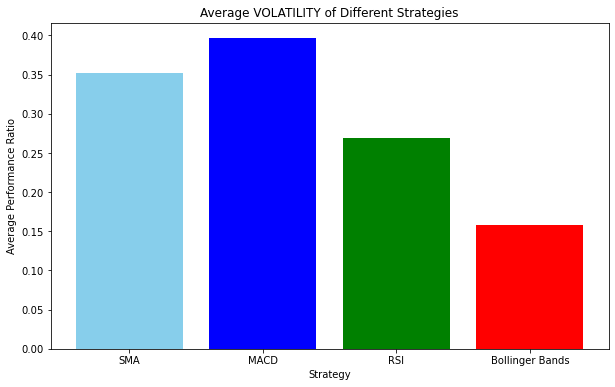

In [91]:
average_volatility_0 = {
    'SMA': average_volatility,
    'MACD': average_volatility1,
    'RSI': average_volatility2,
    'Bollinger Bands': average_volatility3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_cagr_0.keys(), average_volatility_0.values(), color=['skyblue', 'blue', 'green', 'red'])

plt.title('Average VOLATILITY of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()

In [92]:
# 투자전략의 위험 대비 수익률 with cagr and volatility 
def sharpe(DF, ticker, rf):
    "function to calculate Sharpe Ratio of a trading strategy"
    df = DF.copy()
    return (CAGR(df, ticker) - rf) / volatility(df, ticker)

In [93]:
# SMA SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for SMA strategy on {} = {}".format(ticker, sharpe(sma_df, ticker, 0.04)))

Sharpe ratio for SMA strategy on AAPL = 0.19903183303502173
Sharpe ratio for SMA strategy on MSFT = 0.1979865100530214
Sharpe ratio for SMA strategy on GOOGL = 0.21954909949884474
Sharpe ratio for SMA strategy on META = 0.23497421250463207
Sharpe ratio for SMA strategy on AMZN = -0.34207312464798845
Sharpe ratio for SMA strategy on NVDA = 0.2684321495189599
Sharpe ratio for SMA strategy on NFLX = -0.39397836052744956
Sharpe ratio for SMA strategy on TSLA = 0.6828135016215644


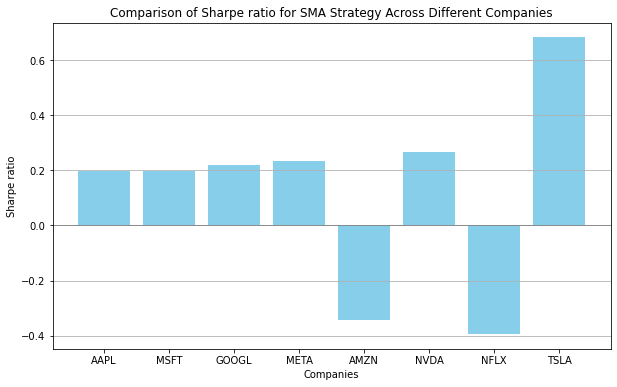

In [94]:
#sma sharpe ratio 시각화
sharpe_ratios = {}

for ticker in tickers:
    sharpe_ratios[ticker] = sharpe(sma_df, ticker,0.04)

ratios = list(sharpe_ratios.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='skyblue')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for SMA Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [95]:
# MACD SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for MACD strategy on {} = {}".format(ticker, sharpe(macd_df, ticker, 0.04)))

Sharpe ratio for MACD strategy on AAPL = -0.8792427599438813
Sharpe ratio for MACD strategy on MSFT = 0.33012280105224073
Sharpe ratio for MACD strategy on GOOGL = -0.05243581784411961
Sharpe ratio for MACD strategy on META = 0.1956295402641978
Sharpe ratio for MACD strategy on AMZN = -0.2294174427325461
Sharpe ratio for MACD strategy on NVDA = -0.30066949312041846
Sharpe ratio for MACD strategy on NFLX = 0.028482232829336013
Sharpe ratio for MACD strategy on TSLA = -0.7519694836805804


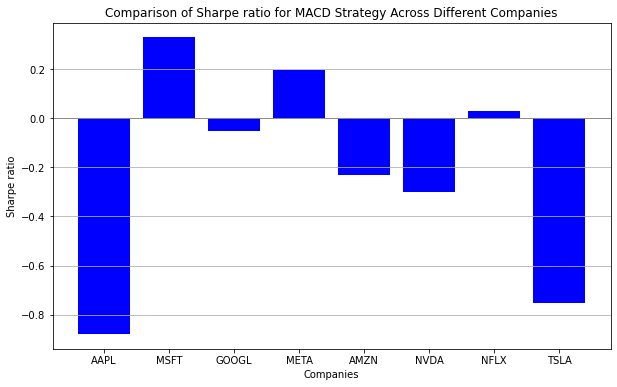

In [96]:
#macd sharpe ratio 시각화
sharpe_ratios1 = {}

for ticker in tickers:
    sharpe_ratios1[ticker] = sharpe(macd_df, ticker,0.04)

ratios = list(sharpe_ratios1.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='blue')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for MACD Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [97]:
# RSI SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for RSI strategy on {} = {}".format(ticker, sharpe(combined_df, ticker, 0.04)))

Sharpe ratio for RSI strategy on AAPL = -0.613571839732506
Sharpe ratio for RSI strategy on MSFT = -0.376048109821449
Sharpe ratio for RSI strategy on GOOGL = 0.3280796485592772
Sharpe ratio for RSI strategy on META = 0.16540148233155616
Sharpe ratio for RSI strategy on AMZN = -0.346970403096916
Sharpe ratio for RSI strategy on NVDA = -0.6228082890137219
Sharpe ratio for RSI strategy on NFLX = -0.6732544672728132
Sharpe ratio for RSI strategy on TSLA = -0.8795210066234534


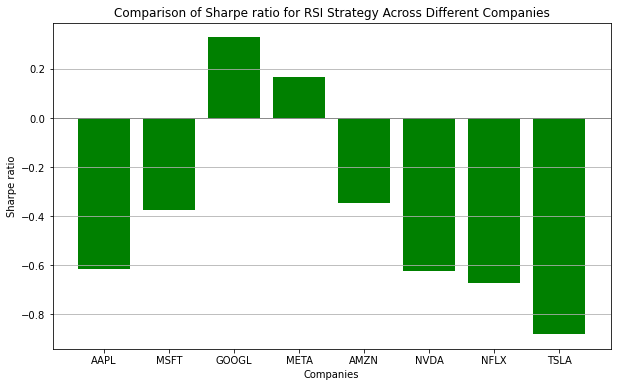

In [98]:
#rsi sharpe ratio 시각화
sharpe_ratios2 = {}

for ticker in tickers:
    sharpe_ratios2[ticker] = sharpe(combined_df, ticker,0.04)

ratios = list(sharpe_ratios2.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='GREEN')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for RSI Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

In [99]:
# BOLLINGER BANDS SHARPE RATIO
for ticker in tickers:
    print("Sharpe ratio for BOLLINGER BANDS strategy on {} = {}".format(ticker, sharpe(combined_df1, ticker, 0.04)))

Sharpe ratio for BOLLINGER BANDS strategy on AAPL = 0.005719120765791398
Sharpe ratio for BOLLINGER BANDS strategy on MSFT = 0.720377542565584
Sharpe ratio for BOLLINGER BANDS strategy on GOOGL = 1.2174134205185299
Sharpe ratio for BOLLINGER BANDS strategy on META = 0.31349974310521944
Sharpe ratio for BOLLINGER BANDS strategy on AMZN = -0.6863977351976525
Sharpe ratio for BOLLINGER BANDS strategy on NVDA = 0.13825040093139127
Sharpe ratio for BOLLINGER BANDS strategy on NFLX = -0.2049314487945521
Sharpe ratio for BOLLINGER BANDS strategy on TSLA = -0.7499173031259039


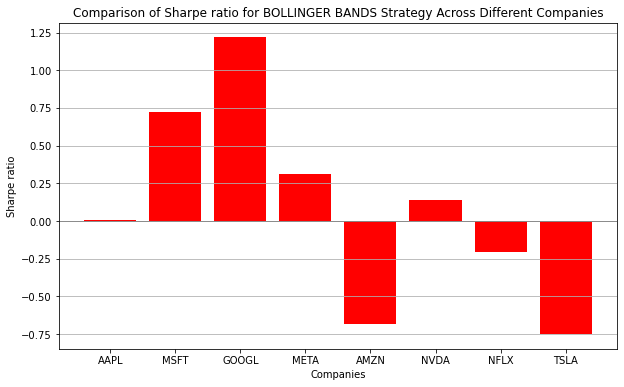

In [100]:
#bb sharpe ratio 시각화
sharpe_ratios3 = {}

for ticker in tickers:
    sharpe_ratios3[ticker] = sharpe(combined_df1, ticker,0.04)

ratios = list(sharpe_ratios3.values())

plt.figure(figsize=(10, 6))
plt.bar(tickers, ratios, color='RED')
plt.xlabel('Companies')
plt.ylabel('Sharpe ratio')
plt.title('Comparison of Sharpe ratio for BOLLINGER BANDS Strategy Across Different Companies')
plt.axhline(0, color='grey', linewidth=0.8)
plt.grid(axis='y')
plt.show()

- 4개 지표별 sharpe ratio 시각화 

In [101]:
average_sharpe = sum(sharpe_ratios.values()) / len(sharpe_ratios)
print("Average SHARPE RATIOS of SMA Strategy: ", average_sharpe)

average_sharpe1 = sum(sharpe_ratios1.values()) / len(sharpe_ratios1)
print("Average SHARPE RATIOS of MACD Strategy: ", average_sharpe1)

average_sharpe2 = sum(sharpe_ratios2.values()) / len(sharpe_ratios2)
print("Average SHARPE RATIOS of RSI Strategy: ", average_sharpe2)

average_sharpe3 = sum(sharpe_ratios3.values()) / len(sharpe_ratios3)
print("Average SHARPE RATIOS of Bollinger Bands Strategy: ", average_sharpe3)

Average SHARPE RATIOS of SMA Strategy:  0.13334197763207578
Average SHARPE RATIOS of MACD Strategy:  -0.20743755289697144
Average SHARPE RATIOS of RSI Strategy:  -0.37733662308375326
Average SHARPE RATIOS of Bollinger Bands Strategy:  0.09425171759605089


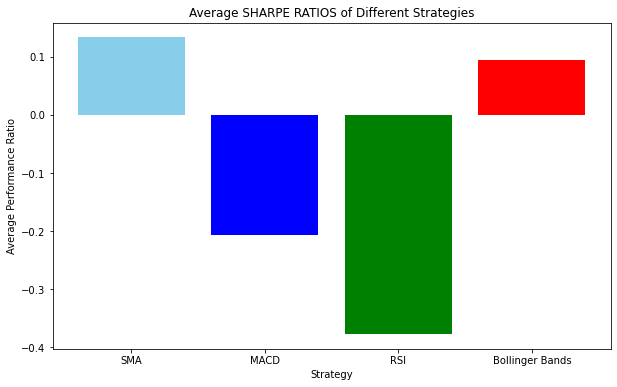

In [102]:
average_sharpe_0 = {
    'SMA': average_sharpe,
    'MACD': average_sharpe1,
    'RSI': average_sharpe2,
    'Bollinger Bands': average_sharpe3
}

# 바 차트 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(average_cagr_0.keys(), average_sharpe_0.values(), color=['skyblue', 'blue', 'green', 'red'])

plt.title('Average SHARPE RATIOS of Different Strategies')
plt.xlabel('Strategy')
plt.ylabel('Average Performance Ratio')

plt.show()

### Maximum Drawdown & Calmar Ratio

In [103]:
#최대 하락 폭
def max_dd(DF, ticker):
    "function to calculate Max Drawdown"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    return (df['drawdown'] / df['cum_roll_max']).max()
#CAGR + max drawdown 조합     
def calmar(DF, ticker):
    "function to calculate Calmar Ratio"
    df = DF.copy()
    return CAGR(df, ticker) / max_dd(df, ticker)

In [104]:
#Calmar Ratio는 연 평균 수익과 최대 하락폭 간의 비율로, 
#투자 전략의 위험 대비 기대 수익을 나타내며, 
#높은 Calmar Ratio는 투자 전략의 높은 수익과 낮은 하락폭을 나타냄

In [105]:
#sma
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(sma_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(sma_df, ticker)))

Max Drawdown of SMA on AAPL = 0.3268587922844069
Calmar Ratio of SMA on AAPL = 0.2778532355792091
Max Drawdown of SMA on MSFT = 0.27523905367481977
Calmar Ratio of SMA on MSFT = 0.32737209717963767
Max Drawdown of SMA on GOOGL = 0.3057838055349394
Calmar Ratio of SMA on GOOGL = 0.30929458230736734
Max Drawdown of SMA on META = 0.4085106983965952
Calmar Ratio of SMA on META = 0.31083600152082264
Max Drawdown of SMA on AMZN = 0.5822063314361003
Calmar Ratio of SMA on AMZN = -0.10742728759144321
Max Drawdown of SMA on NVDA = 0.5422173406837979
Calmar Ratio of SMA on NVDA = 0.29348350285569463
Max Drawdown of SMA on NFLX = 0.5977732630082474
Calmar Ratio of SMA on NFLX = -0.19419081358529275
Max Drawdown of SMA on TSLA = 0.6062653853820686
Calmar Ratio of SMA on TSLA = 0.6844615818659854


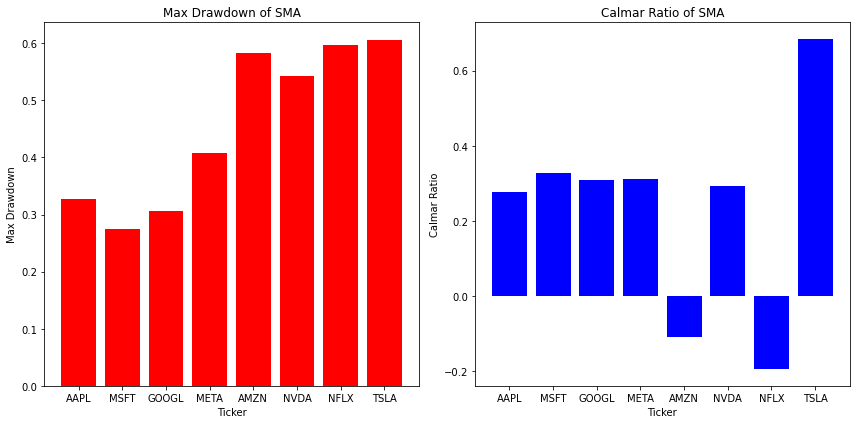

In [106]:
#sma  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(sma_df, ticker))
    calmar_values.append(calmar(sma_df, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of SMA')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of SMA')


plt.tight_layout()
plt.show()


In [107]:
#MACD
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(macd_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(macd_df, ticker)))

Max Drawdown of SMA on AAPL = 0.8244936977639624
Calmar Ratio of SMA on AAPL = -0.2895439094394318
Max Drawdown of SMA on MSFT = 0.3264749735026376
Calmar Ratio of SMA on MSFT = 0.41704091491333595
Max Drawdown of SMA on GOOGL = 0.5383844551354531
Calmar Ratio of SMA on GOOGL = 0.04563928727614666
Max Drawdown of SMA on META = 0.6950300614937575
Calmar Ratio of SMA on META = 0.17192376325467695
Max Drawdown of SMA on AMZN = 0.5624357344653392
Calmar Ratio of SMA on AMZN = -0.0637237926802127
Max Drawdown of SMA on NVDA = 0.7009656665780895
Calmar Ratio of SMA on NVDA = -0.14882821220390094
Max Drawdown of SMA on NFLX = 0.7338879551507698
Calmar Ratio of SMA on NFLX = 0.0716124963355758
Max Drawdown of SMA on TSLA = 0.9690826915194298
Calmar Ratio of SMA on TSLA = -0.43395753683220223


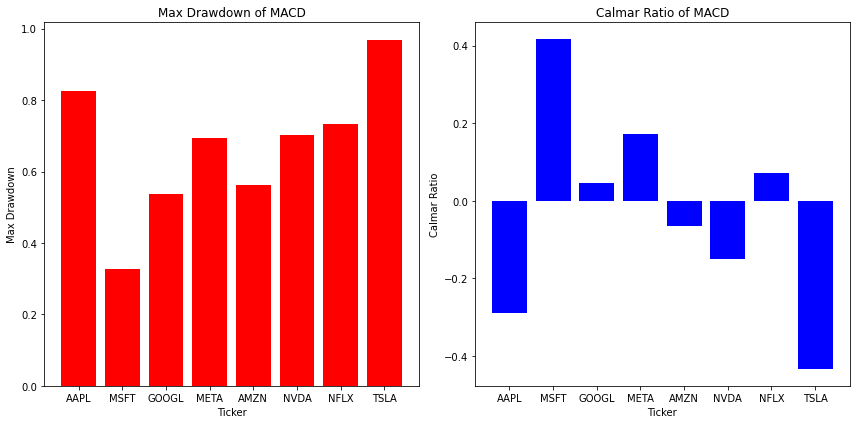

In [108]:
#macd  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(macd_df, ticker))
    calmar_values.append(calmar(macd_df, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of MACD')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of MACD')


plt.tight_layout()
plt.show()

In [109]:
#rsi
for ticker in tickers:
    print("Max Drawdown of RSI on {} = {}".format(ticker, max_dd(combined_df, ticker)))
    print("Calmar Ratio of RSI on {} = {}".format(ticker, calmar(combined_df, ticker)))

Max Drawdown of RSI on AAPL = 0.5731089861409816
Calmar Ratio of RSI on AAPL = -0.18546025445634848
Max Drawdown of RSI on MSFT = 0.27323778297855533
Calmar Ratio of RSI on MSFT = -0.05096368551313116
Max Drawdown of RSI on GOOGL = 0.24129981535220812
Calmar Ratio of RSI on GOOGL = 0.4324814426632298
Max Drawdown of RSI on META = 0.37214883638938334
Calmar Ratio of RSI on META = 0.2331617287398434
Max Drawdown of RSI on AMZN = 0.3939431797545302
Calmar Ratio of RSI on AMZN = -0.10134627448152377
Max Drawdown of RSI on NVDA = 0.7114448027570848
Calmar Ratio of RSI on NVDA = -0.23428836936643752
Max Drawdown of RSI on NFLX = 0.6424459286796819
Calmar Ratio of RSI on NFLX = -0.22385790787079976
Max Drawdown of RSI on TSLA = 0.9407653413966696
Calmar Ratio of RSI on TSLA = -0.3879652016940693


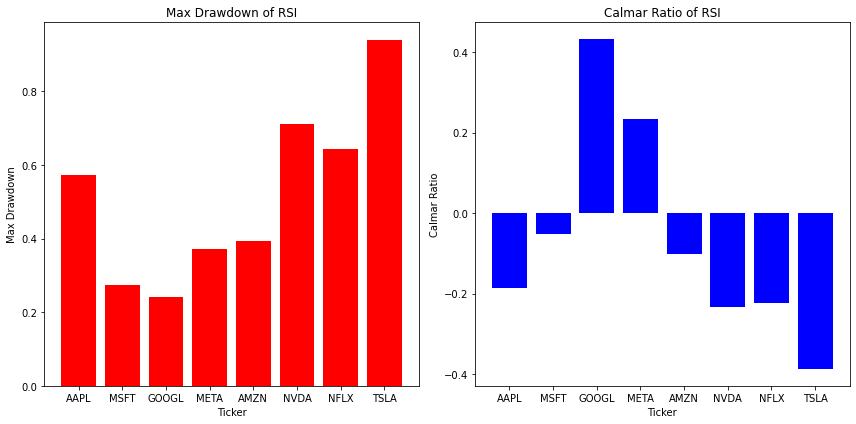

In [110]:
#rsi  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(combined_df, ticker))
    calmar_values.append(calmar(combined_df, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of RSI')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of RSI')


plt.tight_layout()
plt.show()

In [111]:
#BOLLINGER BANDS
for ticker in tickers:
    print("Max Drawdown of BOLLINGER BANDS on {} = {}".format(ticker, max_dd(combined_df1, ticker)))
    print("Calmar Ratio of BOLLINGER BANDS on {} = {}".format(ticker, calmar(combined_df1, ticker)))

Max Drawdown of BOLLINGER BANDS on AAPL = 0.11334092717559047
Calmar Ratio of BOLLINGER BANDS on AAPL = 0.3593334233803789
Max Drawdown of BOLLINGER BANDS on MSFT = 0.08289920303188278
Calmar Ratio of BOLLINGER BANDS on MSFT = 1.5808585108304982
Max Drawdown of BOLLINGER BANDS on GOOGL = 0.07781585962791279
Calmar Ratio of BOLLINGER BANDS on GOOGL = 2.284310125264944
Max Drawdown of BOLLINGER BANDS on META = 0.15621804012167056
Calmar Ratio of BOLLINGER BANDS on META = 0.5643889575676962
Max Drawdown of BOLLINGER BANDS on AMZN = 0.3145057589976007
Calmar Ratio of BOLLINGER BANDS on AMZN = -0.13169352438390314
Max Drawdown of BOLLINGER BANDS on NVDA = 0.24359093395418213
Calmar Ratio of BOLLINGER BANDS on NVDA = 0.26315912850040335
Max Drawdown of BOLLINGER BANDS on NFLX = 0.28665691769479207
Calmar Ratio of BOLLINGER BANDS on NFLX = 0.02670327435715388
Max Drawdown of BOLLINGER BANDS on TSLA = 0.7554324707721608
Calmar Ratio of BOLLINGER BANDS on TSLA = -0.24098737696759048


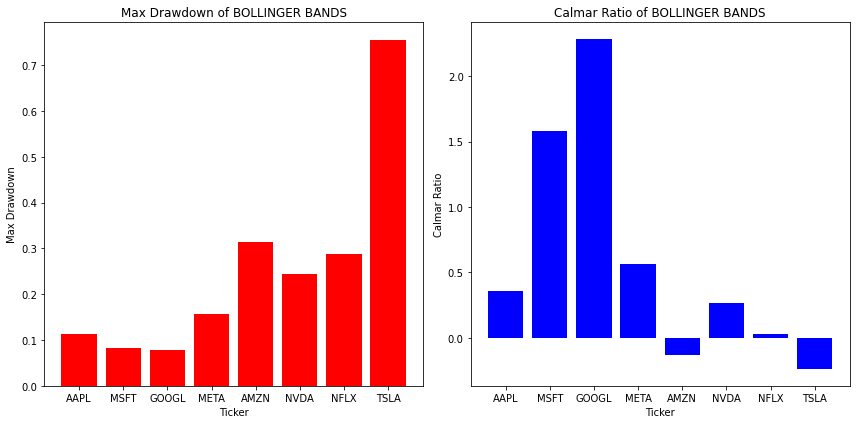

In [112]:
#sma  시각화
max_dd_values = []
calmar_values = []

for ticker in tickers:
    max_dd_values.append(max_dd(combined_df1, ticker))
    calmar_values.append(calmar(combined_df1, ticker))


plt.figure(figsize=(12, 6))

# Max Drawdown 
plt.subplot(1, 2, 1)
plt.bar(tickers, max_dd_values, color='red')
plt.xlabel('Ticker')
plt.ylabel('Max Drawdown')
plt.title('Max Drawdown of BOLLINGER BANDS')

# Calmar Ratio 
plt.subplot(1, 2, 2)
plt.bar(tickers, calmar_values, color='blue')
plt.xlabel('Ticker')
plt.ylabel('Calmar Ratio')
plt.title('Calmar Ratio of BOLLINGER BANDS')


plt.tight_layout()
plt.show()

### Summary Evaluation

In [113]:
eval_df = pd.DataFrame()
eval_df.index = tickers

In [114]:
#sma
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(sma_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(sma_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(sma_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(sma_df, ticker)

eval_df    

bnh_ratio  sharpe_ratio  max_drawdown  calmar_ratio
AAPL    0.594349      0.199032      0.326859      0.277853
MSFT    0.636510      0.197987      0.275239      0.327372
GOOGL   0.941931      0.219549      0.305784      0.309295
META    2.190334      0.234974      0.408511      0.310836
AMZN    0.823802     -0.342073      0.582206     -0.107427
NVDA    0.780011      0.268432      0.542217      0.293484
NFLX    0.696176     -0.393978      0.597773     -0.194191
TSLA    0.652180      0.682814      0.606265      0.684462

In [115]:
#macd
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(macd_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(macd_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(macd_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(macd_df, ticker)

eval_df  

bnh_ratio  sharpe_ratio  max_drawdown  calmar_ratio
AAPL    0.082862     -0.879243      0.824494     -0.289544
MSFT    0.684078      0.330123      0.326475      0.417041
GOOGL   0.704467     -0.052436      0.538384      0.045639
META    2.544056      0.195630      0.695030      0.171924
AMZN    0.730780     -0.229417      0.562436     -0.063724
NVDA    0.245728     -0.300669      0.700966     -0.148828
NFLX    1.214360      0.028482      0.733888      0.071612
TSLA    0.012473     -0.751969      0.969083     -0.433958

In [116]:
#rsi
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(combined_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(combined_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(combined_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(combined_df, ticker)

eval_df  

bnh_ratio  sharpe_ratio  max_drawdown  calmar_ratio
AAPL    0.184972     -0.613572      0.573109     -0.185460
MSFT    0.335447     -0.376048      0.273238     -0.050964
GOOGL   1.081995      0.328080      0.241300      0.432481
META    2.332068      0.165401      0.372149      0.233162
AMZN    0.644871     -0.346970      0.393943     -0.101346
NVDA    0.159487     -0.622808      0.711445     -0.234288
NFLX    0.355960     -0.673254      0.642446     -0.223858
TSLA    0.019790     -0.879521      0.940765     -0.387965

In [117]:
#bb
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(combined_df1, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(combined_df1, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(combined_df1, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(combined_df1, ticker)

eval_df  

bnh_ratio  sharpe_ratio  max_drawdown  calmar_ratio
AAPL    0.385353      0.005719      0.113341      0.359333
MSFT    0.627506      0.720378      0.082899      1.580859
GOOGL   1.386348      1.217413      0.077816      2.284310
META    2.307148      0.313500      0.156218      0.564389
AMZN    0.571953     -0.686398      0.314506     -0.131694
NVDA    0.461608      0.138250      0.243591      0.263159
NFLX    0.708565     -0.204931      0.286657      0.026703
TSLA    0.063057     -0.749917      0.755432     -0.240987

# 전략 별 공통 포지션 진입 시그널 찾기 

- 그 이후 공통 시그널 1개일때 시드의 25%, 2개일 때 50%, 3개일 때 75%, 4개일 때 100% 들어가서 수익률 계산 

In [118]:
#일단 4개 다 합치기
#4개일 때 100% 포지션 들어가는 걸로 ㄱㄱ 
#포지션 탈출 시그널도 생각해야되는구나 4개가 동일할 때 탈출? ㅅㅂ

In [119]:
# # 인덱스를 동일하게 맞추기
# macd_df = macd_df.align(sma_df, join='inner')[0]
# sma_df = sma_df.align(macd_df, join='inner')[1]

# # MACD 및 SMA 전략 계산
# for ticker in tickers:
    
#      # SMA 전략
#     sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
#     sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
#     sma_df[ticker + "_position"] = np.where(sma_df[ticker + "_sma20"] > sma_df[ticker + "_sma50"], 1, -1)
    
    
#     # MACD 전략
#     macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)
#     macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)
#     macd_df[ticker + "_position"] = np.where(macd_df[ticker + "_macd"] > macd_df[ticker + "_macd_signal"], 1, -1)

# # 공통 포지션 진입 로직
# combined_position_df = pd.DataFrame(index=macd_df.index)

# for ticker in tickers:
#     combined_position_df[ticker] = np.where((macd_df[ticker + "_position"] == sma_df[ticker + "_position"]) & (macd_df[ticker + "_position"] != 0), macd_df[ticker + "_position"], 0)

# # combined_position_df에는 이제 날짜 인덱스가 포함됩니다.


In [120]:
# # 인덱스를 동일하게 맞추기
# macd_df = macd_df.align(sma_df, join='inner')[0]
# sma_df = sma_df.align(macd_df, join='inner')[1]

# # MACD 및 SMA 전략 계산
# for ticker in tickers:
#     # MACD 전략
#     macd_df[ticker + "_macd"] = ta.trend.macd(adj_price_df[ticker], 12, 26)
#     macd_df[ticker + "_macd_signal"] = ta.trend.macd_signal(adj_price_df[ticker], 12, 26, 9)
#     macd_df[ticker + "_position"] = np.where(macd_df[ticker + "_macd"] > macd_df[ticker + "_macd_signal"], 1, -1)

#     # SMA 전략
#     sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
#     sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
#     sma_df[ticker + "_position"] = np.where(sma_df[ticker + "_sma20"] > sma_df[ticker + "_sma50"], 1, -1)

# # 공통 포지션 진입 및 탈출 로직
# combined_position_df = pd.DataFrame(index=macd_df.index)

# for ticker in tickers:
#     # 포지션 진입: MACD와 SMA 포지션이 모두 매수(1) 또는 매도(-1)일 때
#     # 포지션 탈출: 하나의 전략이라도 포지션을 종료할 조건이 만족될 때
#     combined_position_df[ticker] = np.where(
#         (macd_df[ticker + "_position"] == sma_df[ticker + "_position"]) & 
#         (macd_df[ticker + "_position"] != 0), 
#         macd_df[ticker + "_position"], 0)




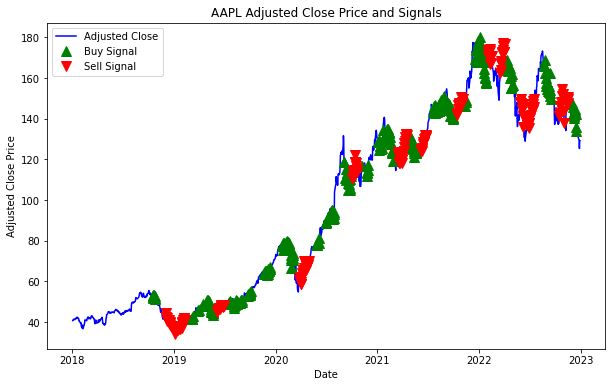

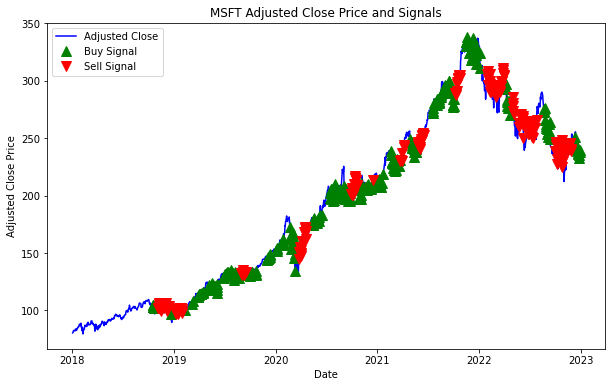

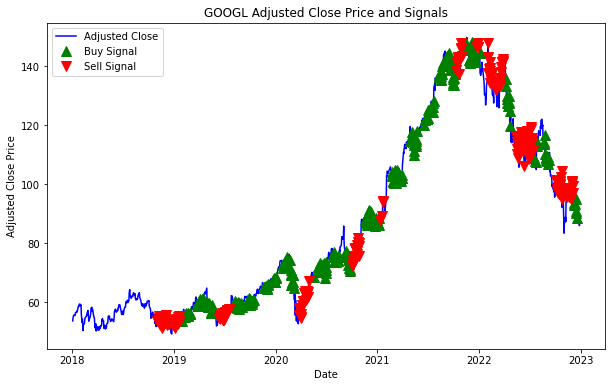

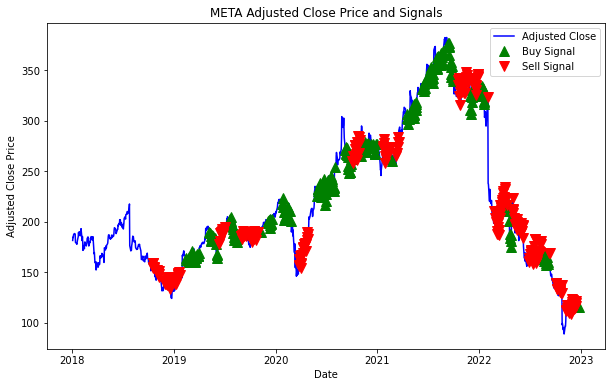

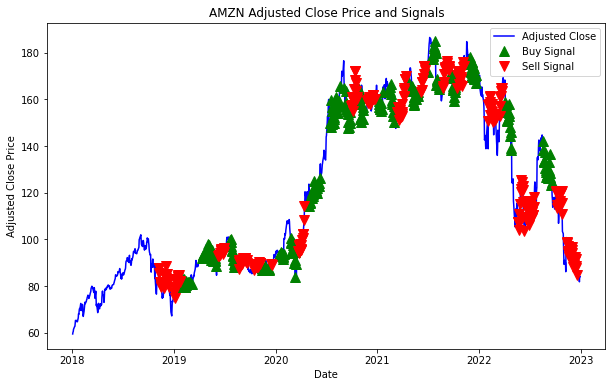

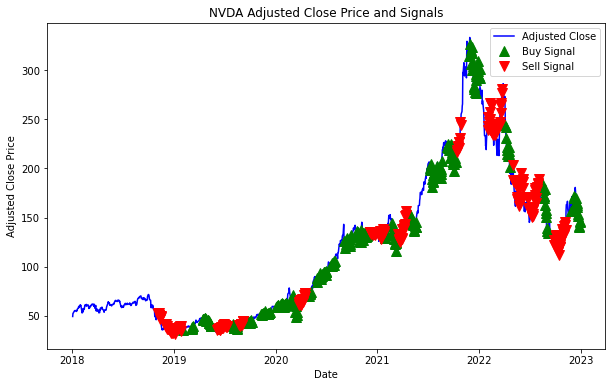

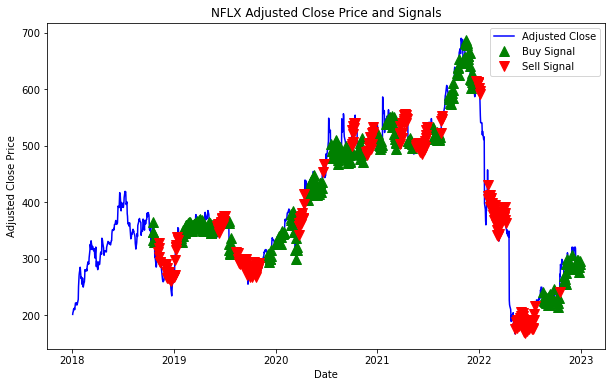

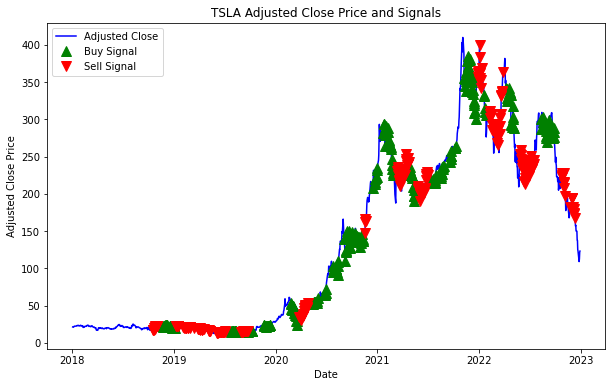

In [121]:
# #포지션 진입 구간 마커로 표시 

# for ticker in tickers:
#     fig, ax = plt.subplots(figsize=(10, 6))

#     # 조정 종가 데이터 그리기
#     ax.plot(adj_price_df[ticker], label='Adjusted Close', color='blue')

#     # 매수 신호 추출 및 numpy 배열로 변환
#     buy_signals = combined_position_df[ticker] == 1
#     buy_indices = combined_position_df[buy_signals].index.to_numpy()

#     # 매도 신호 추출 및 numpy 배열로 변환
#     sell_signals = combined_position_df[ticker] == -1
#     sell_indices = combined_position_df[sell_signals].index.to_numpy()

#     # 매수 포지션을 녹색 점으로 표시 (adj_price_df의 값을 numpy 배열로 변환)
#     ax.plot(buy_indices, adj_price_df[ticker].loc[buy_indices].to_numpy(), '^', markersize=10, color='g', label='Buy Signal')

#     # 매도 포지션을 빨간 점으로 표시 (adj_price_df의 값을 numpy 배열로 변환)
#     ax.plot(sell_indices, adj_price_df[ticker].loc[sell_indices].to_numpy(), 'v', markersize=10, color='r', label='Sell Signal')

#     # 그래프 타이틀 및 레이블
#     ax.set_title(f'{ticker} Adjusted Close Price and Signals')
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Adjusted Close Price')
#     ax.legend()

#     # 그래프 표시
#     plt.show()


In [122]:
# combined_position_df

AAPL  MSFT  GOOGL  META  AMZN  NVDA  NFLX  TSLA
Date                                                       
2018-10-16     1     1      0    -1     0     0     1     0
2018-10-17     1     1      0    -1     0     0     1     0
2018-10-18     1     1      0    -1     0     0     1    -1
2018-10-19     1     1      0    -1     0     0     1    -1
2018-10-22     1     1      0    -1     0     0     1    -1
...          ...   ...    ...   ...   ...   ...   ...   ...
2022-12-23     0     1      0     0     0     1     1     0
2022-12-27     0     1      0     0     0     1     1     0
2022-12-28     0     1      0     1     0     1     1     0
2022-12-29     0     1      0     0     0     1     1     0
2022-12-30     0     1      0     0     0     1     1     0

[1060 rows x 8 columns]